# **Project 3**, APS1070 Winter 2024
#### **PCA [14 marks]**
**Deadline: Mar 14th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

In this project we work on a [stores sales dataset](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data) that reports the total daily sales for different product families sold at all the Favorita stores located in Ecuador from Oct 2016 to Aug 2017.

Please fill out the following:


*   **Name**: Abdullah Rasul
*   **Student number**: 1011328243



### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Part 1: Getting started with GitHub [1.5 Marks + 1.5 Mark Git Submission]

This first part of the project assignment is to be completed independently from Parts 2 - 5. In this part you will be completing some coding tasks and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac:
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Create a personal access token using your Github account. Go to Settings >> Developer Settings >> Personal access tokens >> Tokens (classic) and generate a new token (also classic). When creating the token make sure to fill the `Note` section and select the repo scope (for repository access, like pushing) and workflow (required to modify workflow files). Make sure you copy the Personal Access Token as soon as it gets generated.


 2. Open this link: https://classroom.github.com/a/K52RvYAl to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS1070-UofT/w24-project-3-part-1-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

In [ ]:
### Add the link here ###
# https://github.com/APS1070-UofT/w24-project-3-part-1-AbdullahRasul

 3. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 4. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 5. Get your assignment by the link you got in step 2:
```
git clone https://github.com/APS1070-UofT/w24-project-3-part-1-*********
```

 6. You will be asked to enter your Github username and password. Enter the username for your github account into the `Username` field, and paste the `personal access token` which you copied in step 1, into the `Password` field.


 7. A new folder should be created in your directory similar to:
```
C:\aps1070\w24-project-3-part-1-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions.

 8. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 7.

 9. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded.

 10. To submit your work, follow:
```
cd <your assignment folder>
git add W24_Project_3_Part_1_git.ipynb
git commit -m "Final Submission"
git push
```
If you have any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or
git push origin HEAD:main
```

 11. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.**

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (304, 304).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99.9% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [78]:
import pandas as pd
data_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/TotalSalesbyFamily.csv',
    index_col=0
)

In [79]:
# Libraries

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



In [80]:
# visualizing some of the data
data_raw.head()

2016-10-15  2016-10-16  2016-10-17  2016-10-18  2016-10-19  \
family                                                                   
AUTOMOTIVE       388.0       499.0       266.0       262.0       237.0   
BABY CARE         21.0        29.0        21.0        11.0        23.0   
BEAUTY           342.0       451.0       277.0       231.0       222.0   
BEVERAGES     197333.0    258559.0    151406.0    129897.0    127212.0   
BOOKS            117.0       127.0        83.0       110.0        90.0   

            2016-10-20  2016-10-21  2016-10-22  2016-10-23  2016-10-24  ...  \
family                                                                  ...   
AUTOMOTIVE       288.0       272.0       432.0       517.0       299.0  ...   
BABY CARE          8.0         9.0        12.0        17.0        12.0  ...   
BEAUTY           223.0       227.0       369.0       440.0       230.0  ...   
BEVERAGES     124603.0    144526.0    192343.0    241561.0    142098.0  ...   
BOOKS             78.0        96.0       114.0        94.0        84.0  ...   

            2017-08-06  2017-08-07  2017-08-08  2017-08-09  2017-08-10  \
family                                                                   
AUTOMOTIVE       583.0       355.0       327.0       314.0       313.0   
BABY CARE         16.0        14.0         5.0        10.0         5.0   
BEAUTY           558.0       317.0       328.0       315.0       309.0   
BEVERAGES     250784.0    179419.0    160636.0    153010.0    156449.0   
BOOKS              1.0         0.0         1.0         2.0         0.0   

            2017-08-11  2017-08-12  2017-08-13  2017-08-14  2017-08-15  
family                                                                  
AUTOMOTIVE       441.0       403.0       481.0       292.0       337.0  
BABY CARE          7.0         3.0         9.0         9.0         8.0  
BEAUTY           351.0       369.0       433.0       337.0       339.0  
BEVERAGES     189111.0    182318.0    202354.0    174832.0    170773.0  
BOOKS              0.0         0.0         1.0         0.0         0.0  

[5 rows x 304 columns]

In [81]:
# standardizing the data
data_std = StandardScaler().fit_transform(data_raw)

In [82]:
### YOUR CODE HERE ###

'''
1. Compute the covariance matrix of the dataframe.
Hint: The dimensions of your covariance matrix should be (304, 304).
---------------------------------------------------------------------------

'''
n, m = data_std.shape

# Compute covariance matrix using tutorial code
C = np.dot(data_std.T, data_std) / (n-1)


print(" Shape of covariance matrix ", C.shape)


 Shape of covariance matrix  (304, 304)


In [83]:
'''
2. Write a function get_sorted_eigen(df_cov) that gets the covariance
matrix of dataframe df (from step 1), and returns sorted eigenvalues and
eigenvectors using np.linalg.eigh. [0.25]
---------------------------------------------------------------------------

'''
# sorting according to the eigenvalues

# below function is following the tutorial code

def get_sorted_eigen(df_cov):
    eigenValues, eigenVectors = np.linalg.eigh(df_cov)

    args = (-eigenValues).argsort()
    eigenValues = eigenValues[args]
    eigenVectors = eigenVectors[:, args]

    return eigenValues, eigenVectors

sorted_eigenvalues, sorted_eigenvectors = get_sorted_eigen(C)

print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("Sorted Eigenvectors:\n", sorted_eigenvectors)

Sorted Eigenvalues:
 [ 3.10790058e+02  1.21144815e+00  8.85780588e-01  2.96788123e-01
  1.26127556e-01  1.01293070e-01  2.68175750e-02  1.87617943e-02
  1.46284790e-02  1.07817223e-02  6.06198058e-03  4.09729053e-03
  2.22814289e-03  1.75347827e-03  1.07873242e-03  7.82535660e-04
  6.71586630e-04  4.16064079e-04  1.64129544e-04  1.06196594e-04
  5.37655456e-05  3.89865160e-05  1.83381304e-05  1.33054838e-05
  9.95090384e-06  8.17058681e-06  4.54304942e-06  3.87243020e-06
  2.80152277e-06  7.10901859e-07  2.98168140e-07  1.30141014e-07
  5.25260258e-14  3.65260174e-14  2.63499204e-14  2.14800236e-14
  1.94910076e-14  1.76231647e-14  1.73962953e-14  1.57366849e-14
  1.49083822e-14  1.44007808e-14  1.42133764e-14  1.36759726e-14
  1.30309007e-14  1.29101258e-14  1.28292426e-14  1.22445997e-14
  1.21007649e-14  1.15117969e-14  1.13757085e-14  1.10037073e-14
  1.04265736e-14  1.02525713e-14  9.73094401e-15  9.39458683e-15
  9.31045959e-15  9.22707610e-15  8.89874945e-15  8.55539533e-15
  8.

[99.13558466903648, 0.38642684051099074, 0.28254564216933375, 0.09466925762209484, 0.04023207513986728]
0.9913558466903654


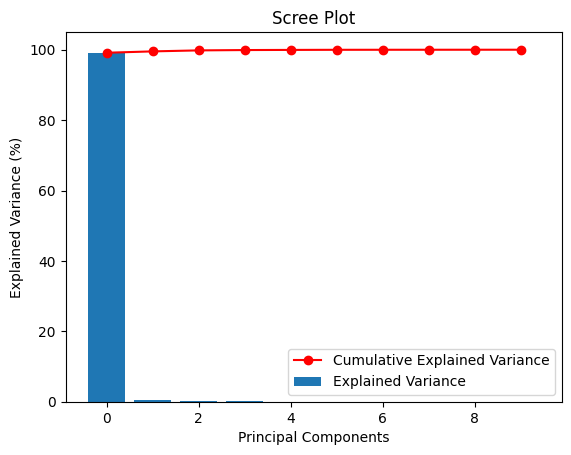

In [84]:
'''

3. Show the effectiveness of your principal components in covering the
variance of the dataset with a scree plot. [0.25]
---------------------------------------------------------------------------



'''

eigValSum = sum(sorted_eigenvalues)
expVar = [eigV/eigValSum*100 for eigV in sorted_eigenvalues]
cumExpVar = np.cumsum(expVar)
eigValSum = sum(sorted_eigenvalues)
expVar = [(eigV / eigValSum) * 100 for eigV in sorted_eigenvalues]

#showing only first five
print(expVar[:5])

print(sorted_eigenvalues[0]/np.sum(sorted_eigenvalues))

# Bar plot for explained variance
plt.bar(range(10), expVar[:10], label='Explained Variance')

# Line plot for cumulative explained variance
plt.plot(range(10), cumExpVar[:10], 'r-o', label='Cumulative Explained Variance')

plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.legend()
plt.show()

In [85]:
'''
4. How many PCs do you need to cover 99.9% of the dataset's variance?
---------------------------------------------------------------------------

Ans: 5
'''

print(cumExpVar[:6])

print("\n--------- We need 5 PCs to cover 99.9% ------------------ ")

[99.13558467 99.52201151 99.80455715 99.89922641 99.93945848 99.97176887]

--------- We need 5 PCs to cover 99.9% ------------------ 


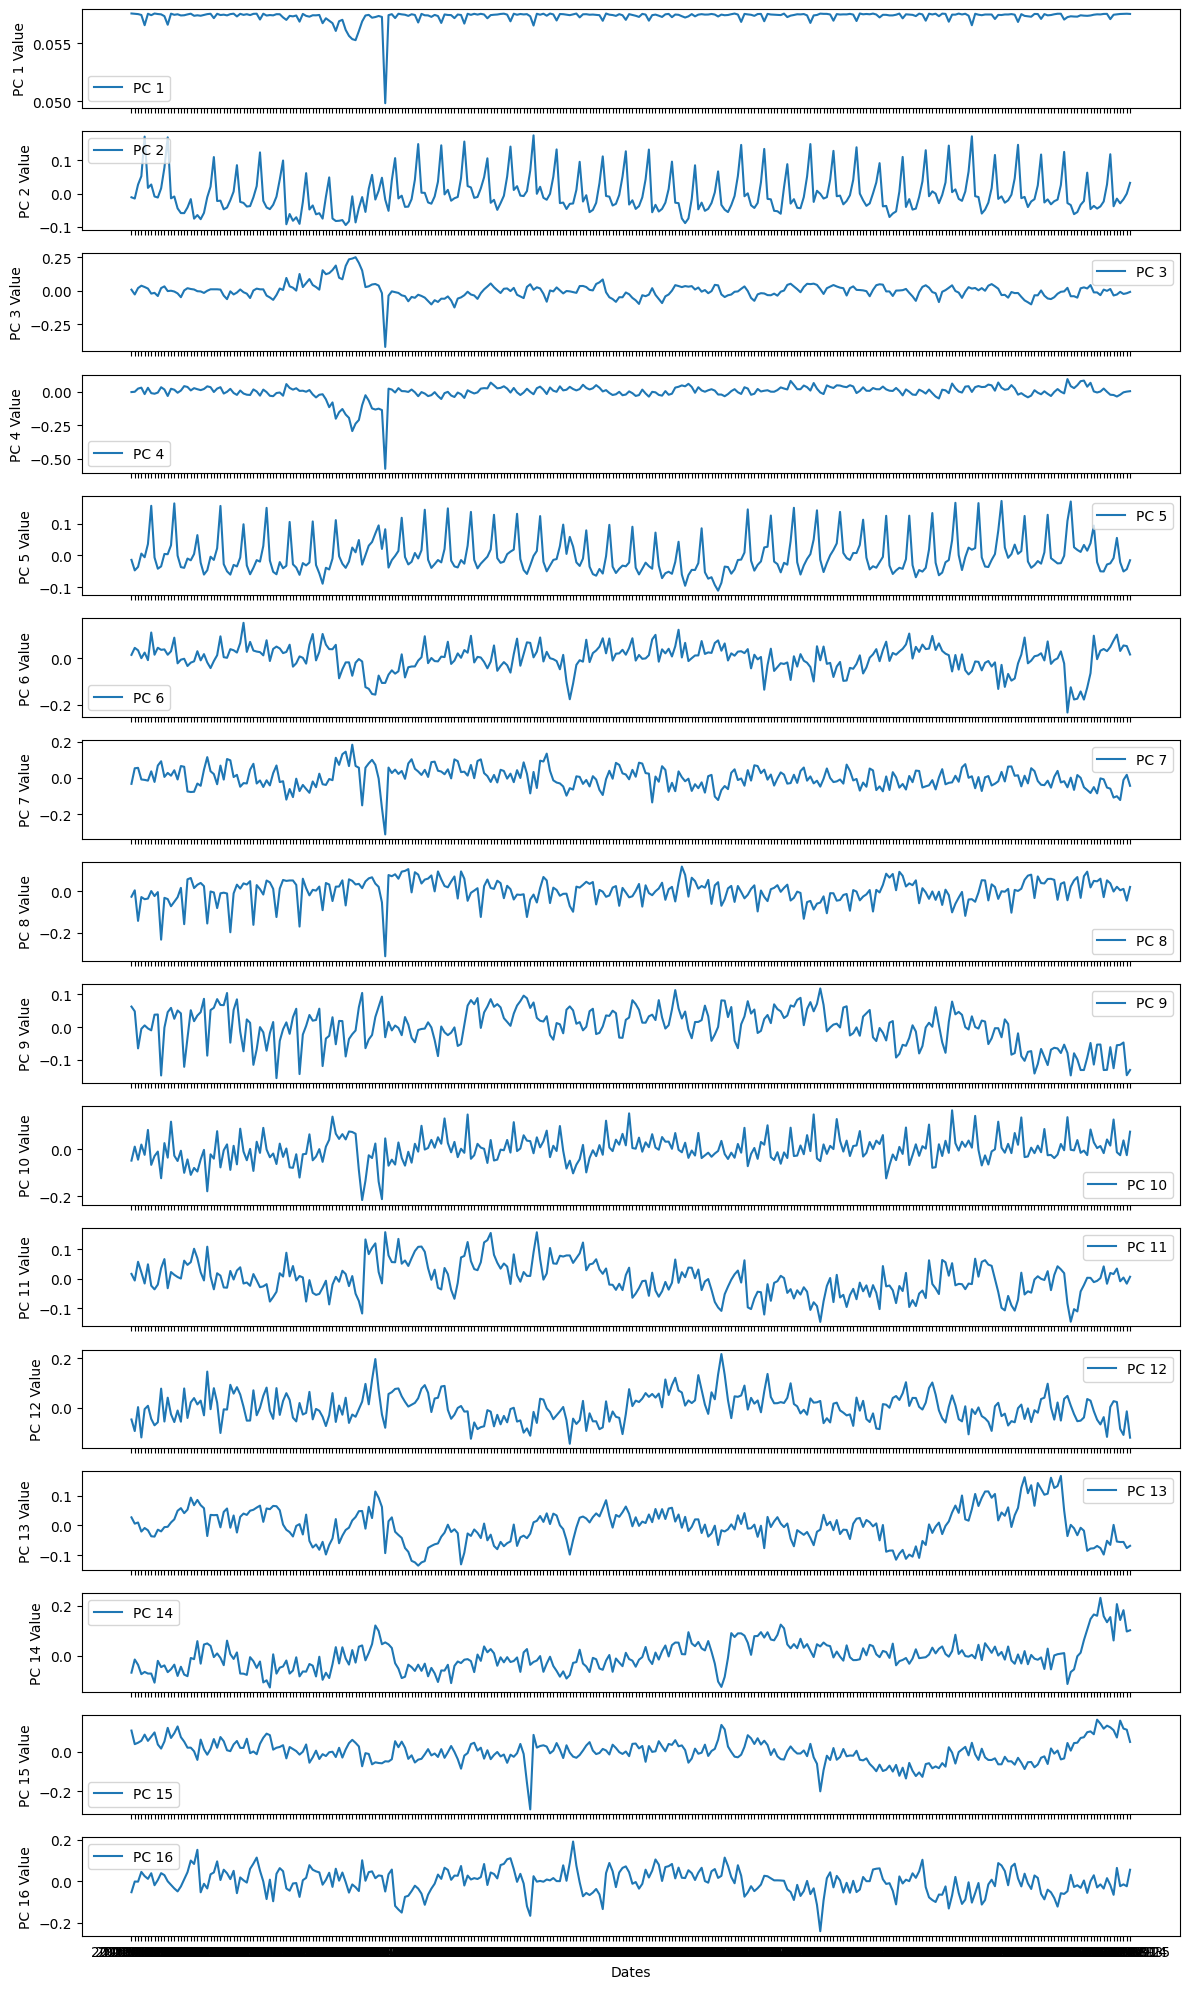

In [86]:
'''

5. Plot the first 16 principal components (Eigenvectors) as a time series
(16 subplots, on the x-axis you have dates and on the y-axis you have the
value of the PC element) . [0.5]

'''


PC = 16
dates = data_raw.columns  # Dates are in the columns of your DataFrame

# Transposing the eigenvectors array for correct dimension match
transposed_eigenvectors = sorted_eigenvectors.T

fig, axes = plt.subplots(nrows=PC, figsize=(12, 20), sharex=True)

# Plotting each principal component
for i in range(PC):
    axes[i].plot(dates, transposed_eigenvectors[i], label=f'PC {i+1}')
    axes[i].set_ylabel(f'PC {i+1} Value')

# common x-axis label
axes[-1].set_xlabel('Dates')

# Adding legend
for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()



In [ ]:
'''
6. Compare the first few PCs with the rest of them. Do you see any
difference in their trend?

The first few principal components (PCs) demonstrate trends in
the data and are relatively smoother. These components represent the
overarching structure of the dataset. In contrast, the later PCs exhibit
greater fluctuations without clear patterns, suggesting they capture more
sensitive or insignificant features. This observation aligns with the
general understanding of PCA, where the initial PCs explain the majority
of the variance in the dataset, while the later ones capture finer
details or noise.

'''


# Part 3: Data reconstruction [4.5 Marks]

Create a function that:

*   Accepts a family and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigenvectors and eigenvalues.
*   Plots 4 figures:
  1.   The original time-series for the specified family. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified family in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable):
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[1]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error.
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `POULTRY`, `GROCERY I`, `SCHOOL AND OFFICE SUPPLIES`, `CELEBRATION`, `LAWN AND GARDEN`, and `FROZEN FOODS` as inputs. **[0.5]**


In [110]:

#####################  Part 3: Data reconstruction

def plot_family_figures(original_df, family_name):
    # Create subplots
    fig, axs =  plt.subplots(4, 1, figsize=(24, 8), sharex=False, sharey=False)


    # 1. The original time-series for the specified family.
    axs[0].plot(original_df.loc[family_name, :])
    axs[0].set_title(f'Original Time-Series for {family_name} - PCA Part')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Original Data cf World')

    # 2. The incremental reconstruction of the original (not standardized) time-series for the specified family in a single plot.

    # Standardize the data
    scaler = StandardScaler()
    scaled = scaler.fit_transform(original_df.values)

    # Compute eigenvectors and eigenvalues
    Cov_matrix = np.dot(scaled.T, scaled) / (scaled.shape[0] - 1)
    eigenvalues, eigenvectors = get_sorted_eigen(Cov_matrix)

    # Define different numbers of principal components
    num_components = [1, 2, 4, 8, 16]

    # List to store reconstruction errors
    reconstruction_errors = []

    for num_comp in num_components:
        # Perform PCA
        W = eigenvectors[:, :num_comp]
        project = np.dot(scaled, W)
        reconstruction = scaler.inverse_transform(np.dot(project, W.T))
        inverse_df = pd.DataFrame(reconstruction, columns=original_df.columns, index=original_df.index)
        family = inverse_df[inverse_df.index == family_name]

        # Plotting incremental reconstruction
        axs[1].plot(family.T, label=f'Reconstruction with {num_comp} PCs')
        axs[1].set_title(f'Incremental Reconctruction for {family_name} - PCA Part')
        axs[1].legend(["PC1","PC1 - PC2","PC1 to PC4","PC1 - PC8","PC1 - PC16"])


    # 3. The residual error for the best reconstruction with respect to the original time-series.
    # Assuming PC16 is considered the best reconstruction in this case

    # Get the projection and reconstruction for PC1 to PC16
    PC1_16 = eigenvectors[:, 0:16]
    proj1_16 = np.dot(scaled, PC1_16)
    Recon1_16 = np.dot(proj1_16, PC1_16.T)
    scaler.fit(original_df.values)
    inverse1_16 = pd.DataFrame(scaler.inverse_transform(Recon1_16), columns=original_df.columns, index=original_df.index)
    PC16_family = inverse1_16[inverse1_16.index == family_name]
    re_df = pd.DataFrame(original_df.loc[family_name])
    residual_error = re_df.T - PC16_family

    # Plotting residual error
    axs[2].plot(residual_error.T, label='Residual error for PC1 to PC16')
    axs[2].set_title(f'Residual Error of Reconstruction for {family_name} - PCA Part')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Residuals')



    RMSE_total = []
    for num_comp in range(1, 11):
        # Perform PCA
        W = eigenvectors[:, :num_comp]
        project = np.dot(scaled, W)
        reconstruction = scaler.inverse_transform(np.dot(project, W.T))
        inverse_df = pd.DataFrame(reconstruction, columns=original_df.columns, index=original_df.index)
        family = inverse_df[inverse_df.index == family_name]

        # Calculate RMSE
        y_actual = pd.DataFrame(original_df.loc[family_name]).T
        RMSE = mean_squared_error(y_actual, family, squared=False)
        RMSE_total.append(RMSE)

    # Plotting RMSE
    axs[3].plot(range(1, 11), RMSE_total)
    axs[3].set_title(f'RMSE of Reconstruction for {family_name} - PCA Part')
    axs[3].set_xlabel('Number of Components')
    axs[3].set_ylabel('RMSE')

    plt.tight_layout()
    plt.show()


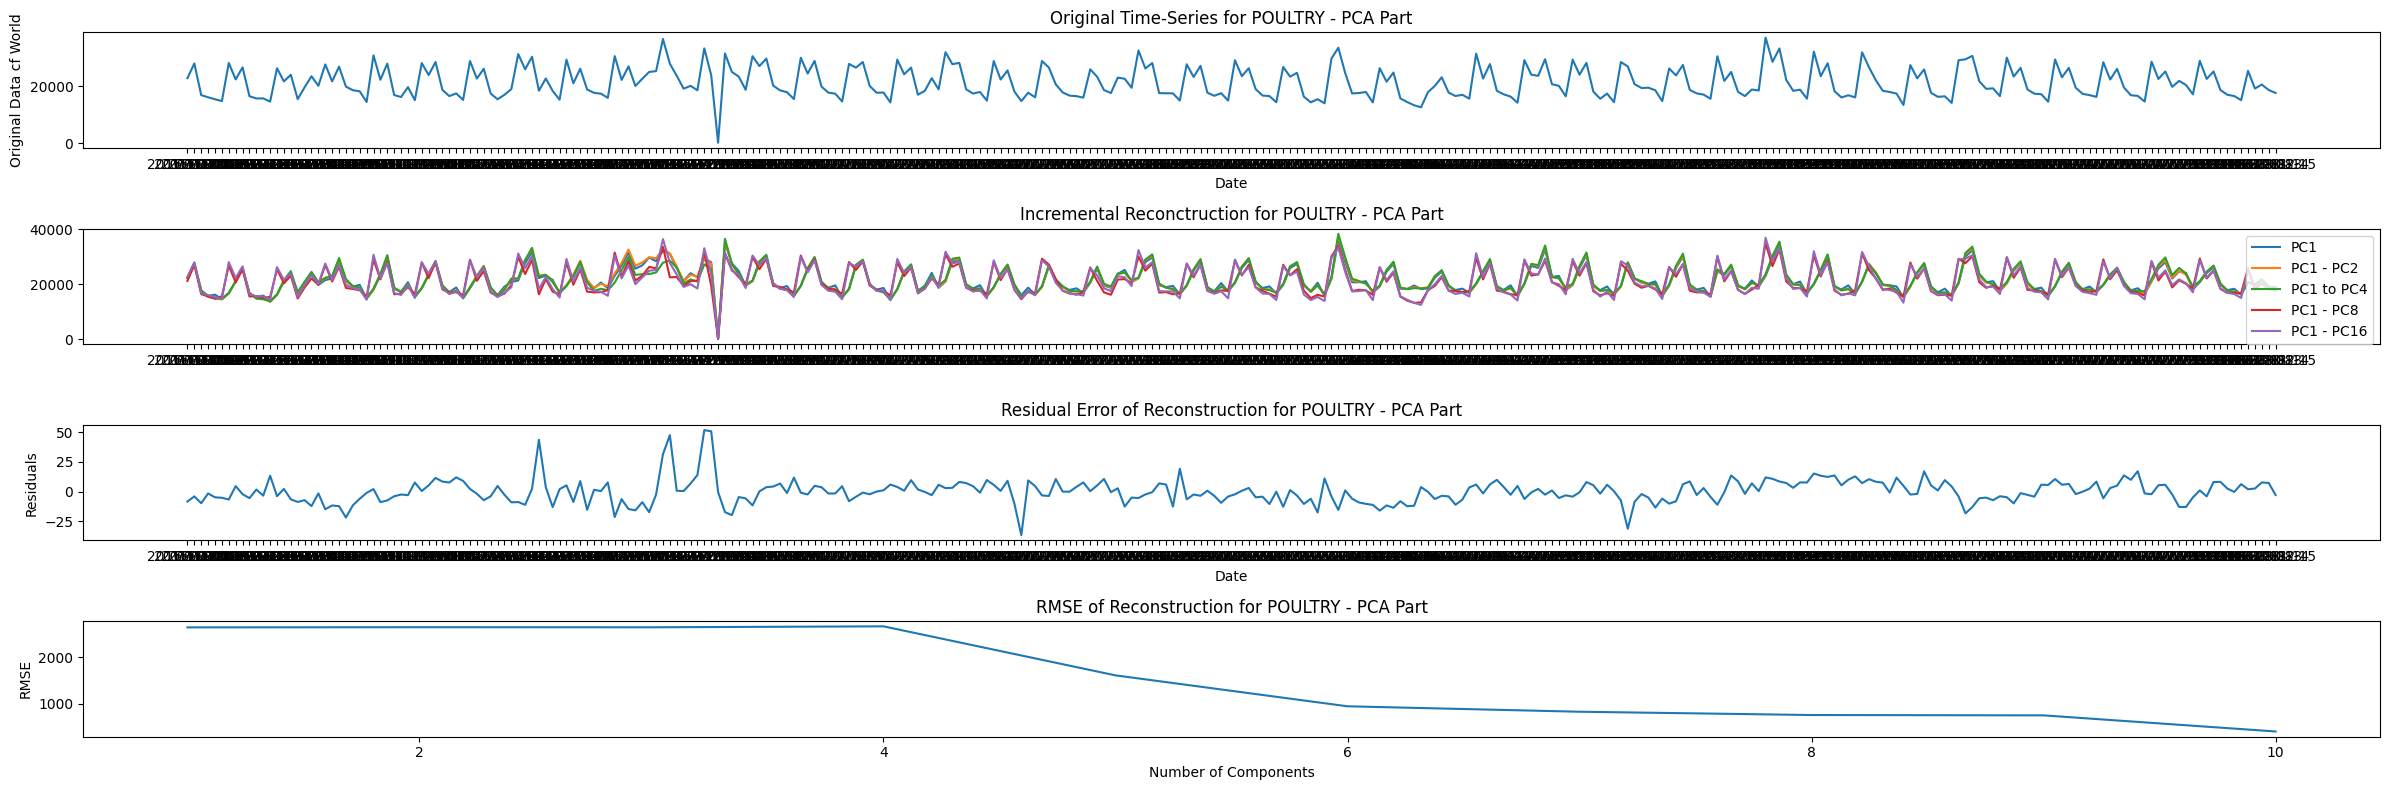

In [111]:
plot_family_figures(data_raw, "POULTRY")
#-----------

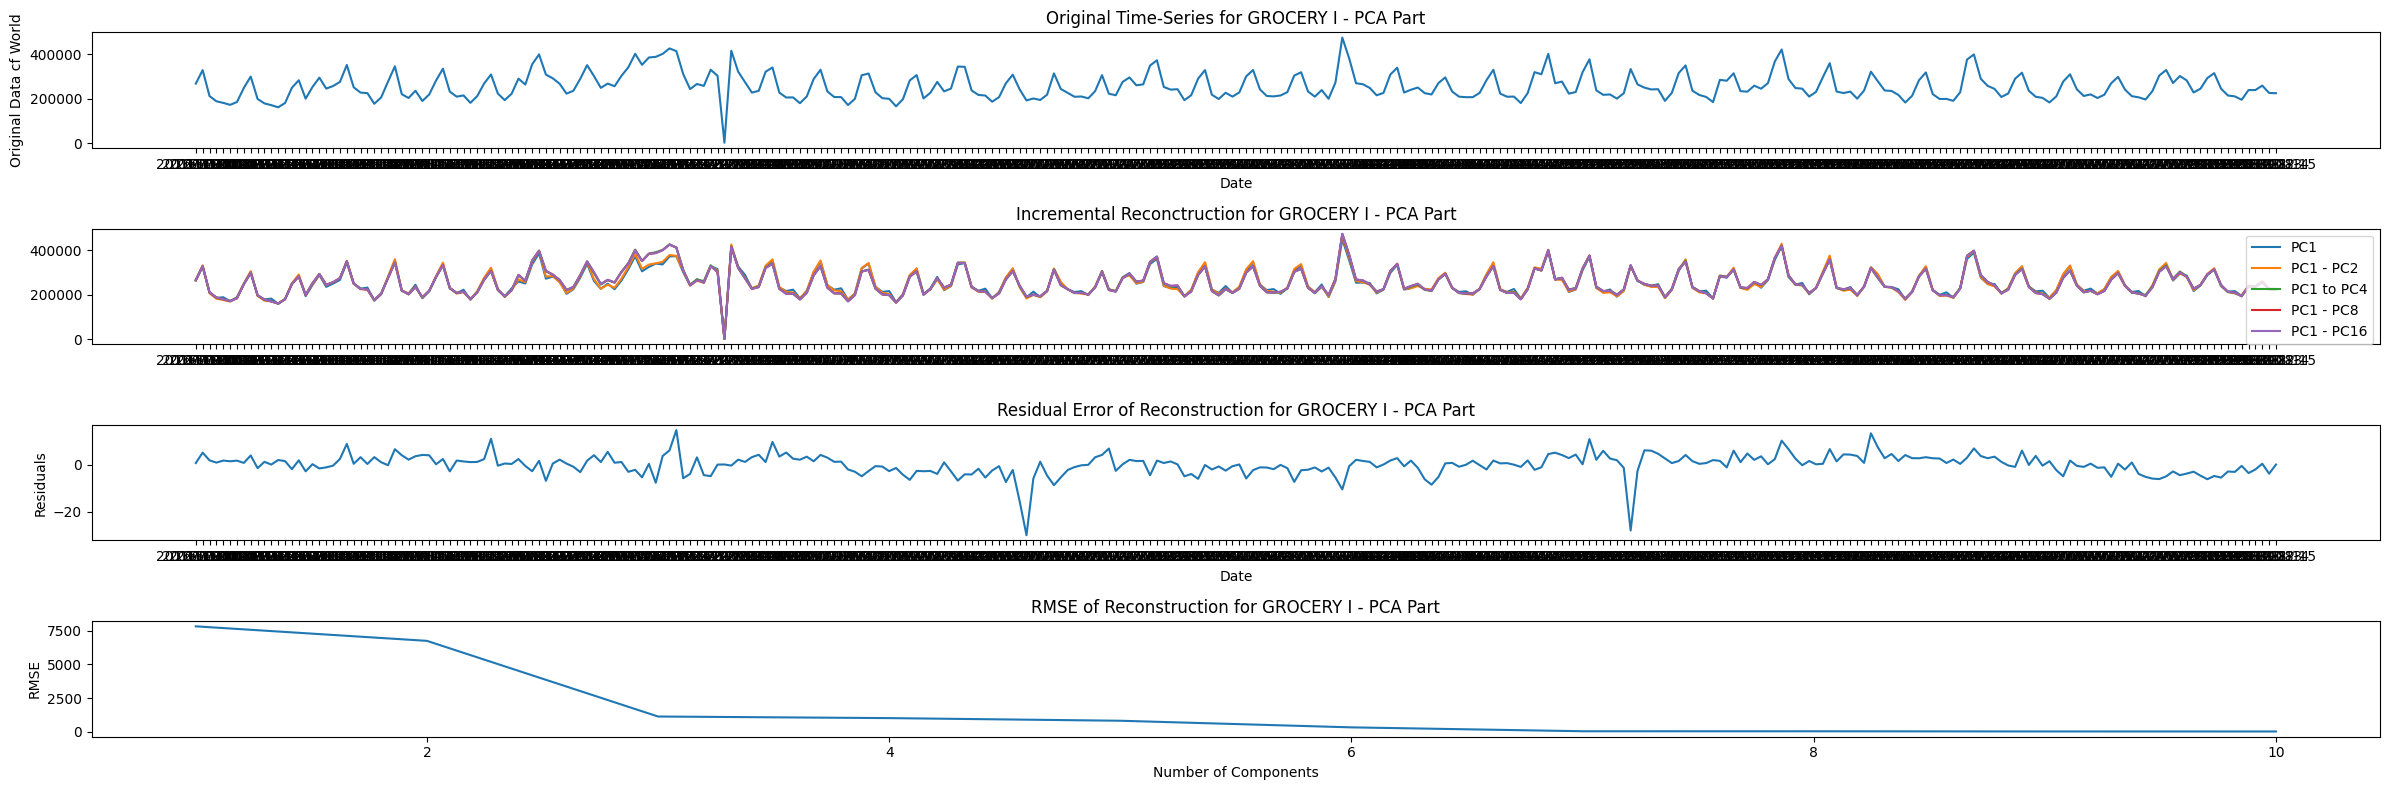

In [112]:
plot_family_figures(data_raw, "GROCERY I")

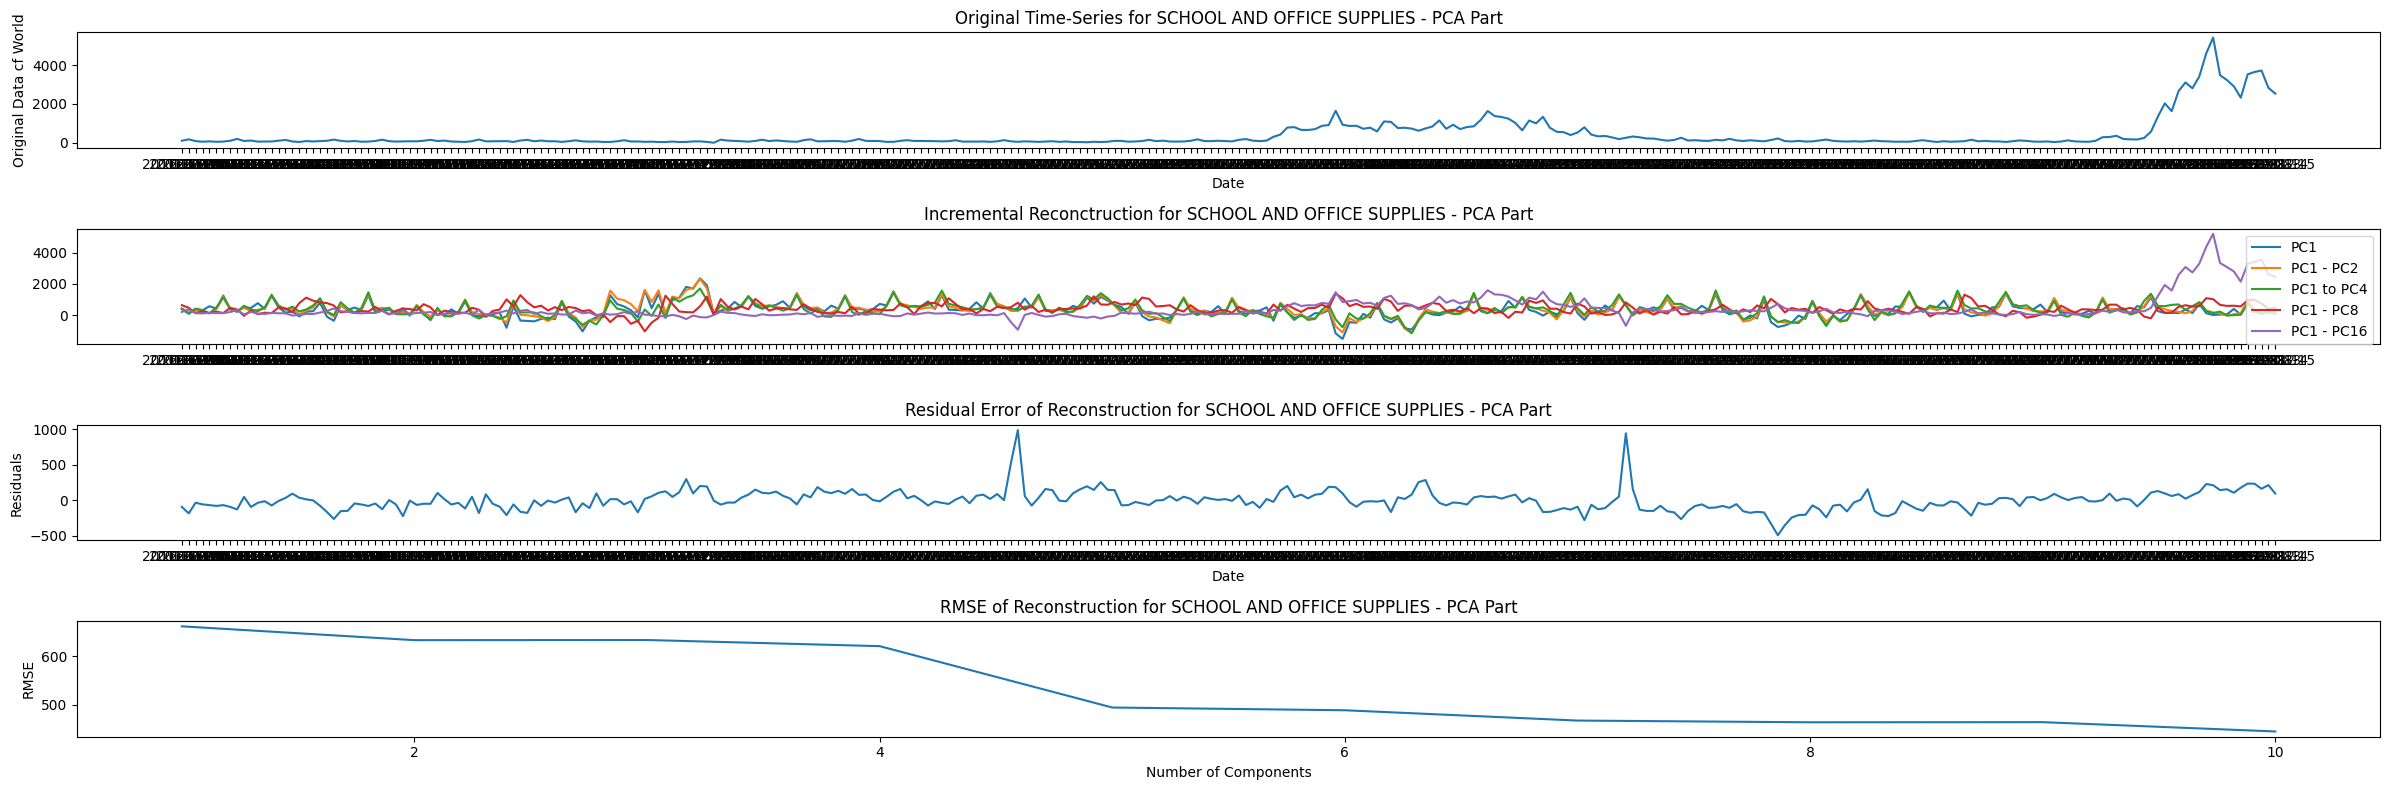

In [113]:
plot_family_figures(data_raw, "SCHOOL AND OFFICE SUPPLIES")

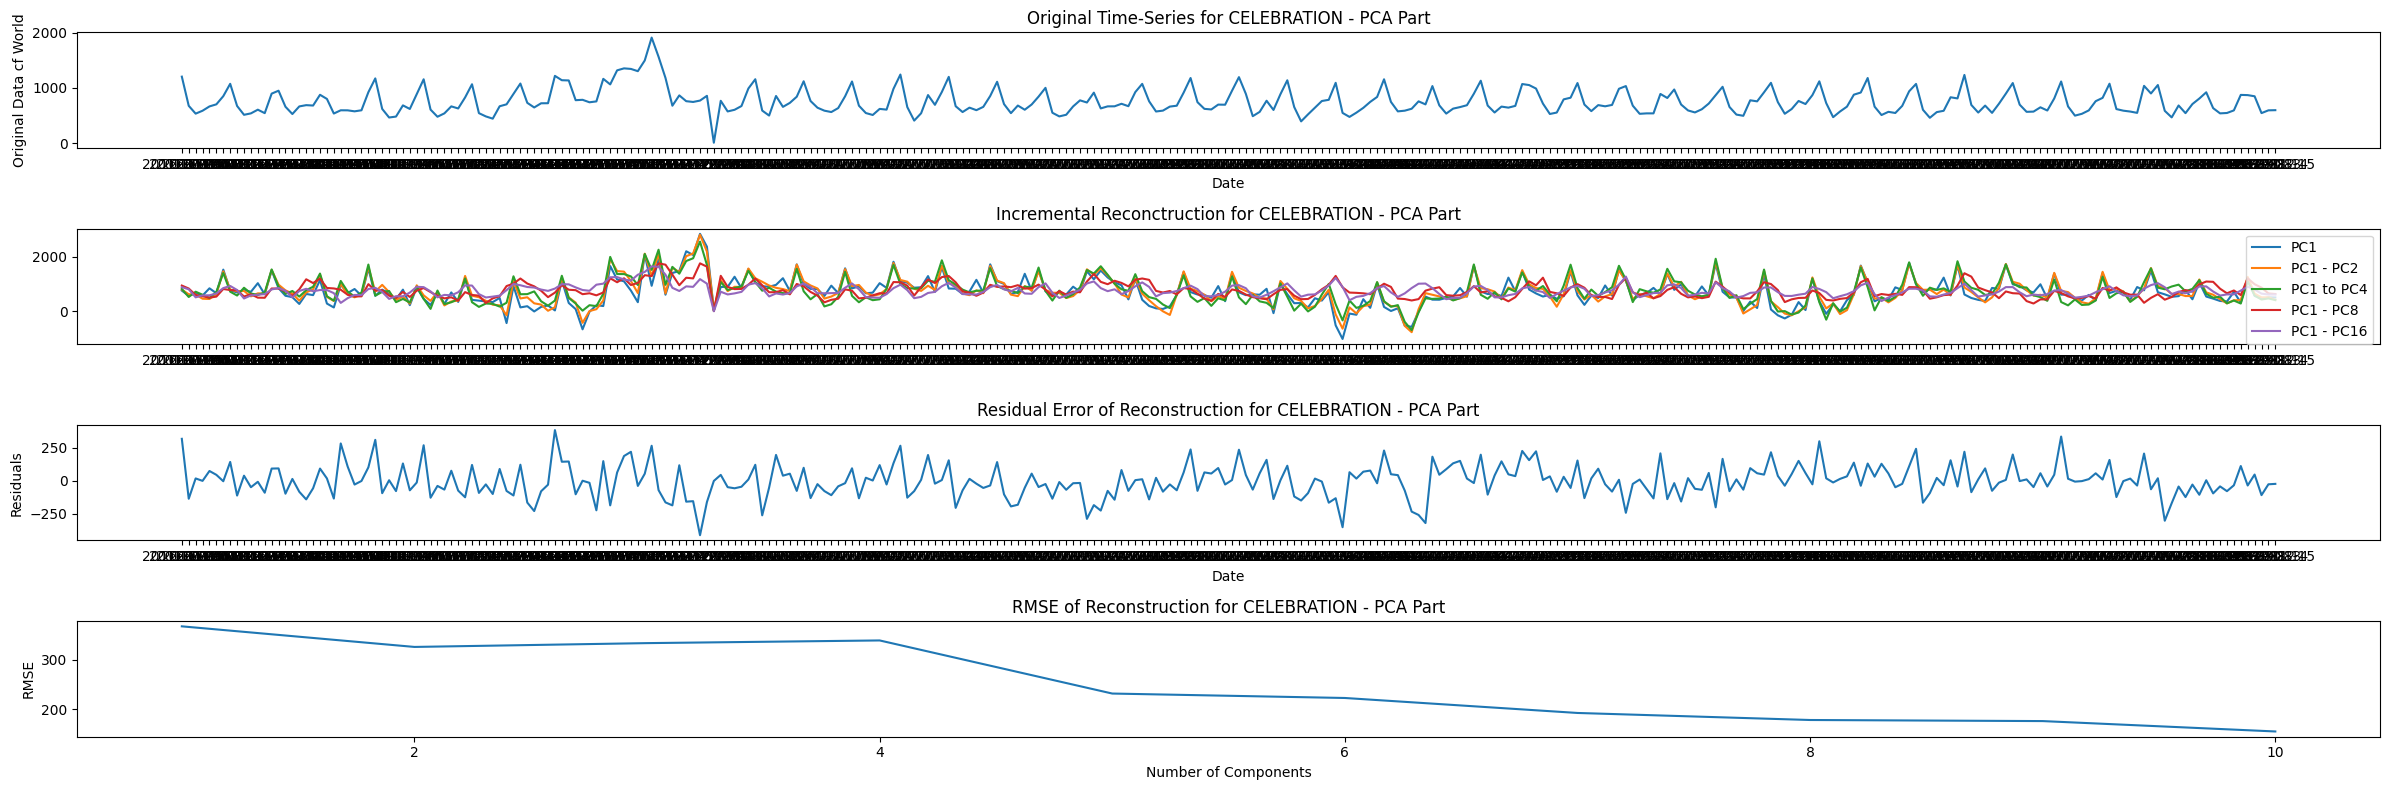

In [114]:
plot_family_figures(data_raw, "CELEBRATION")

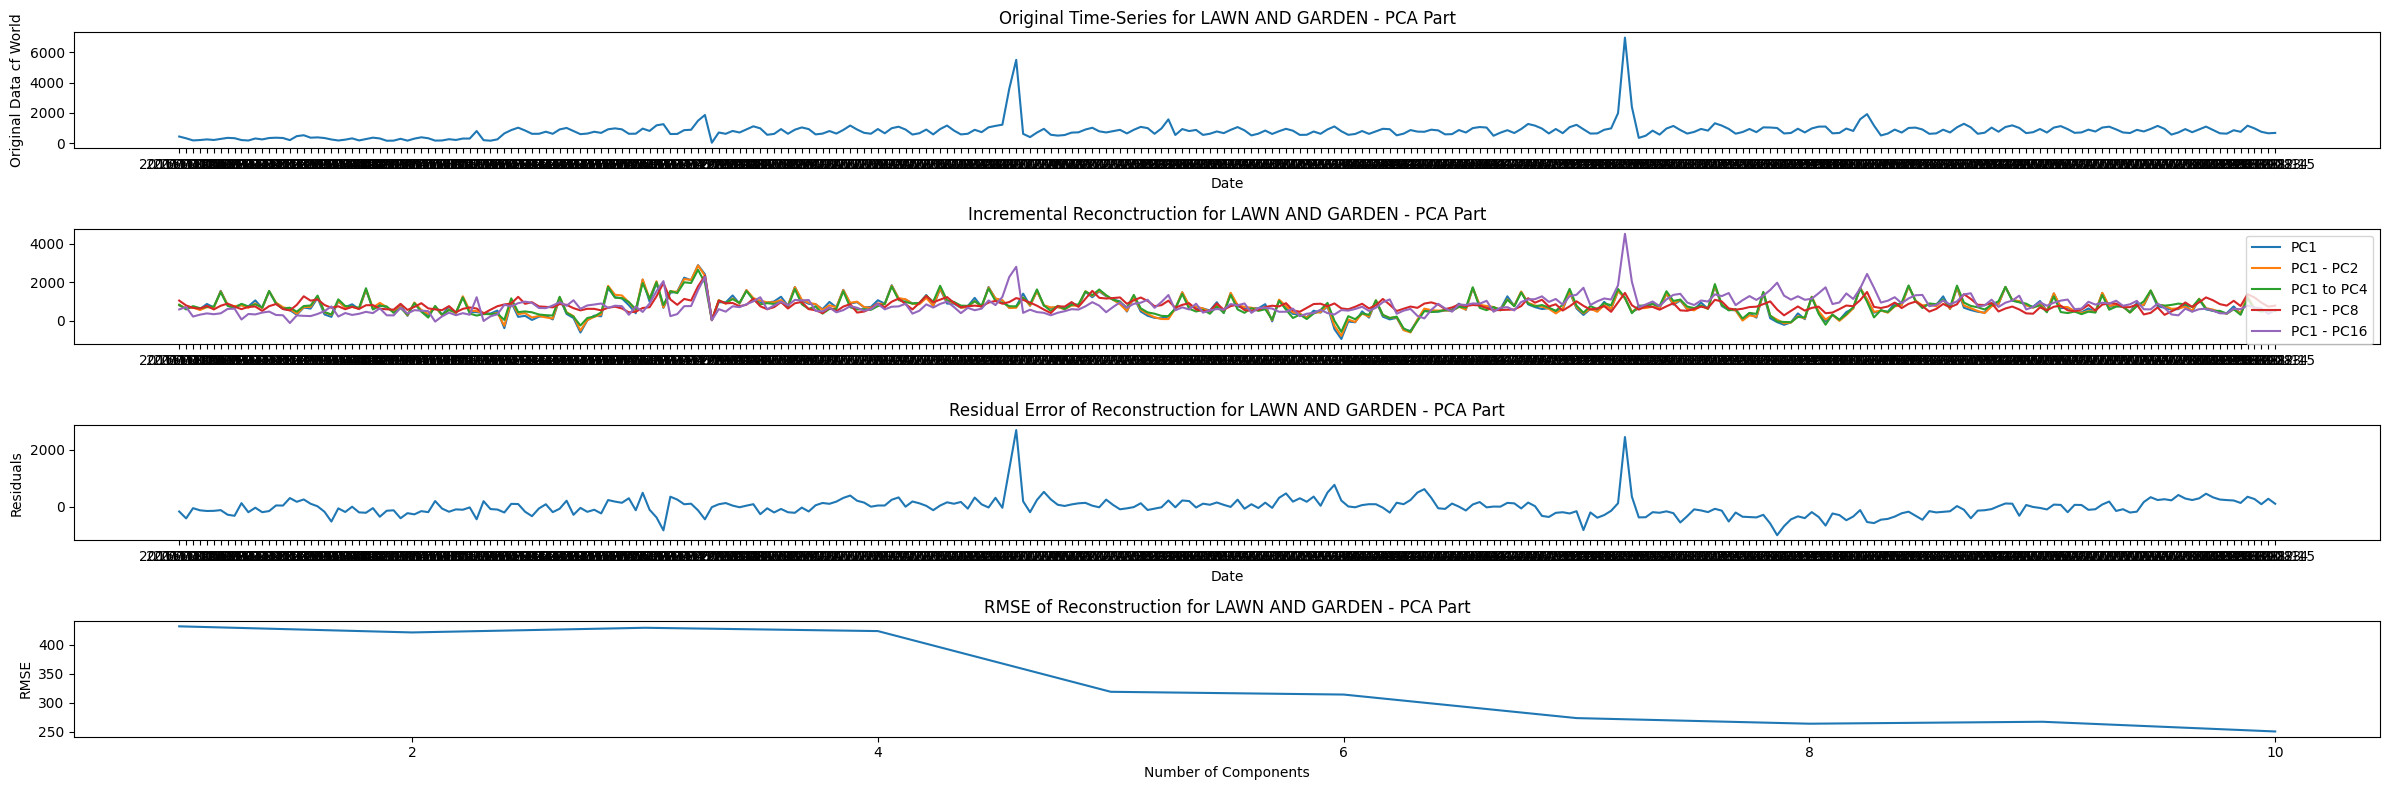

In [115]:
plot_family_figures(data_raw, "LAWN AND GARDEN")

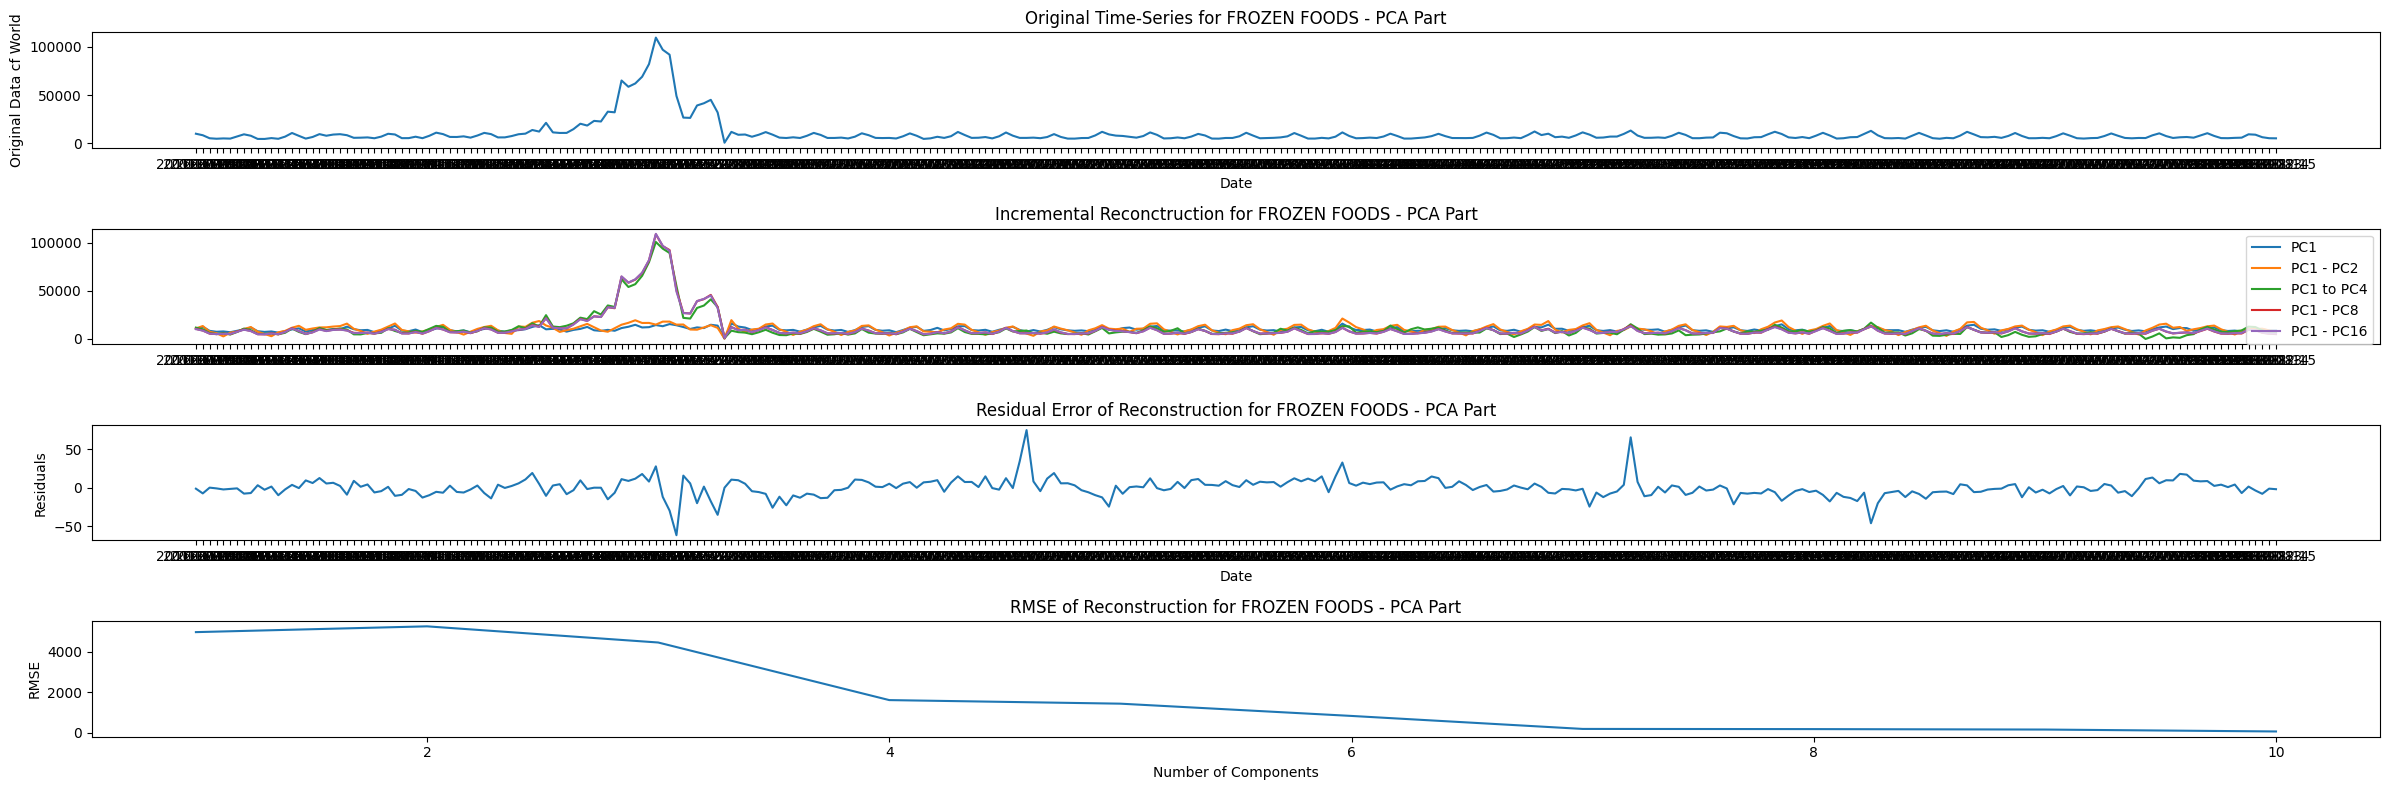

In [116]:
plot_family_figures(data_raw, "FROZEN FOODS")

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. Write a function to make this comparison **[0.5]**, and comment on the results. **[0.5]**.

In [103]:
'''
Modify your code in part 3 to use SVD instead of PCA.
---------------------------------------------------------------------

'''


def plot_family_figures_svd(original_df, family_name):
    # Create subplots
    fig, axs =  plt.subplots(4, 1, figsize=(24, 8), sharex=False, sharey=False)

    # 1. The original time-series for the specified family.
    axs[0].plot(original_df.loc[family_name, :])
    axs[0].set_title(f'Original Time-Series for {family_name} - SVD Part')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Original Data')

    # Compute SVD
    U, Sigma, VT = np.linalg.svd(original_df.values, full_matrices=False)

    # Define different numbers of singular values
    num_components = [1, 2, 4, 8, 16]

    for num_comp in num_components:
        # Reconstruct using the first num_comp singular values
        reconstruction = np.dot(U[:, :num_comp] * Sigma[:num_comp], VT[:num_comp, :])
        inverse_df = pd.DataFrame(reconstruction, columns=original_df.columns, index=original_df.index)
        family = inverse_df[inverse_df.index == family_name]

        # Plotting incremental reconstruction
        axs[1].plot(family.T, label=f'Reconstruction with {num_comp} singular values')
        axs[1].set_title(f'Incremental Reconstruction of {family_name} with SVD')
        axs[1].legend(["1","1 - 2","1 - 4","1 - 8","1 - 16"])


    # 3. The residual error for the best reconstruction with respect to the original time-series.
    # Use all singular values for the best reconstruction
    reconstruction_best = np.dot(U[:, :16] * Sigma[:16], VT[:16, :])
    inverse_best = pd.DataFrame(reconstruction_best, columns=original_df.columns, index=original_df.index)
    family_all = inverse_best[inverse_best.index == family_name]
    svd_f_all = pd.DataFrame(original_df.loc[family_name])
    residual_error_best = svd_f_all.T - family_all

    # Plotting residual error for the best reconstruction
    axs[2].plot(residual_error_best.T, label='Residual error using all singular values')
    axs[2].legend()
    axs[2].set_title(f'Residual Error of Reconstruction for {family_name}- SVD Part')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Residuals')

    # 4. The RMSE of the reconstruction as a function of the number of included components
    RMSE_total = []
    for num_comp in range(1, 11):
        # Reconstruct using the first num_comp singular values
        reconstruction = np.dot(U[:, :num_comp] * Sigma[:num_comp], VT[:num_comp, :])
        inverse_df = pd.DataFrame(reconstruction, columns=original_df.columns, index=original_df.index)
        family = inverse_df[inverse_df.index == family_name]

        # Calculate RMSE
        y_actual = pd.DataFrame(original_df.loc[family_name]).T
        RMSE = mean_squared_error(y_actual, family, squared=False)
        RMSE_total.append(RMSE)

    # Plotting RMSE
    axs[3].plot(range(1, 11), RMSE_total)
    axs[3].set_title(f'RMSE of Reconstruction for {family_name} - SVD Part')
    axs[3].set_xlabel('Number of Components')
    axs[3].set_ylabel('RMSE')


    plt.tight_layout()
    plt.show()

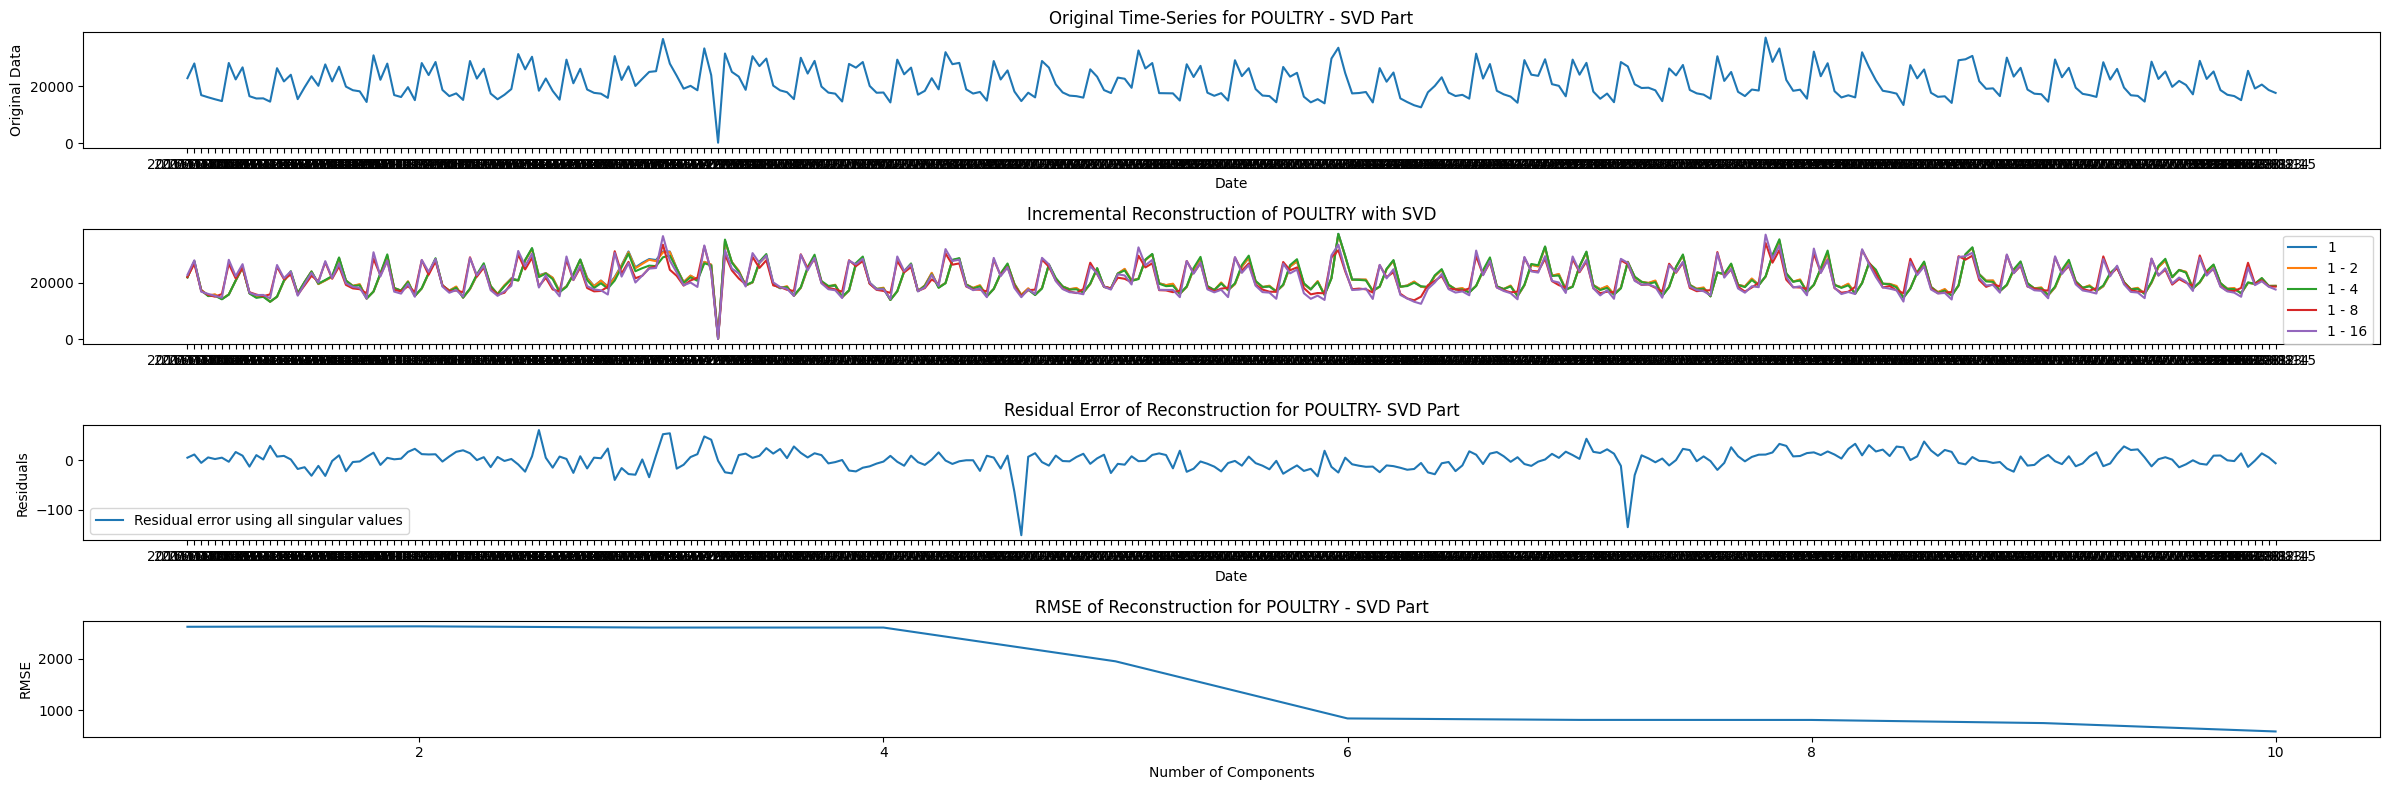

In [104]:
plot_family_figures_svd(data_raw, "POULTRY")

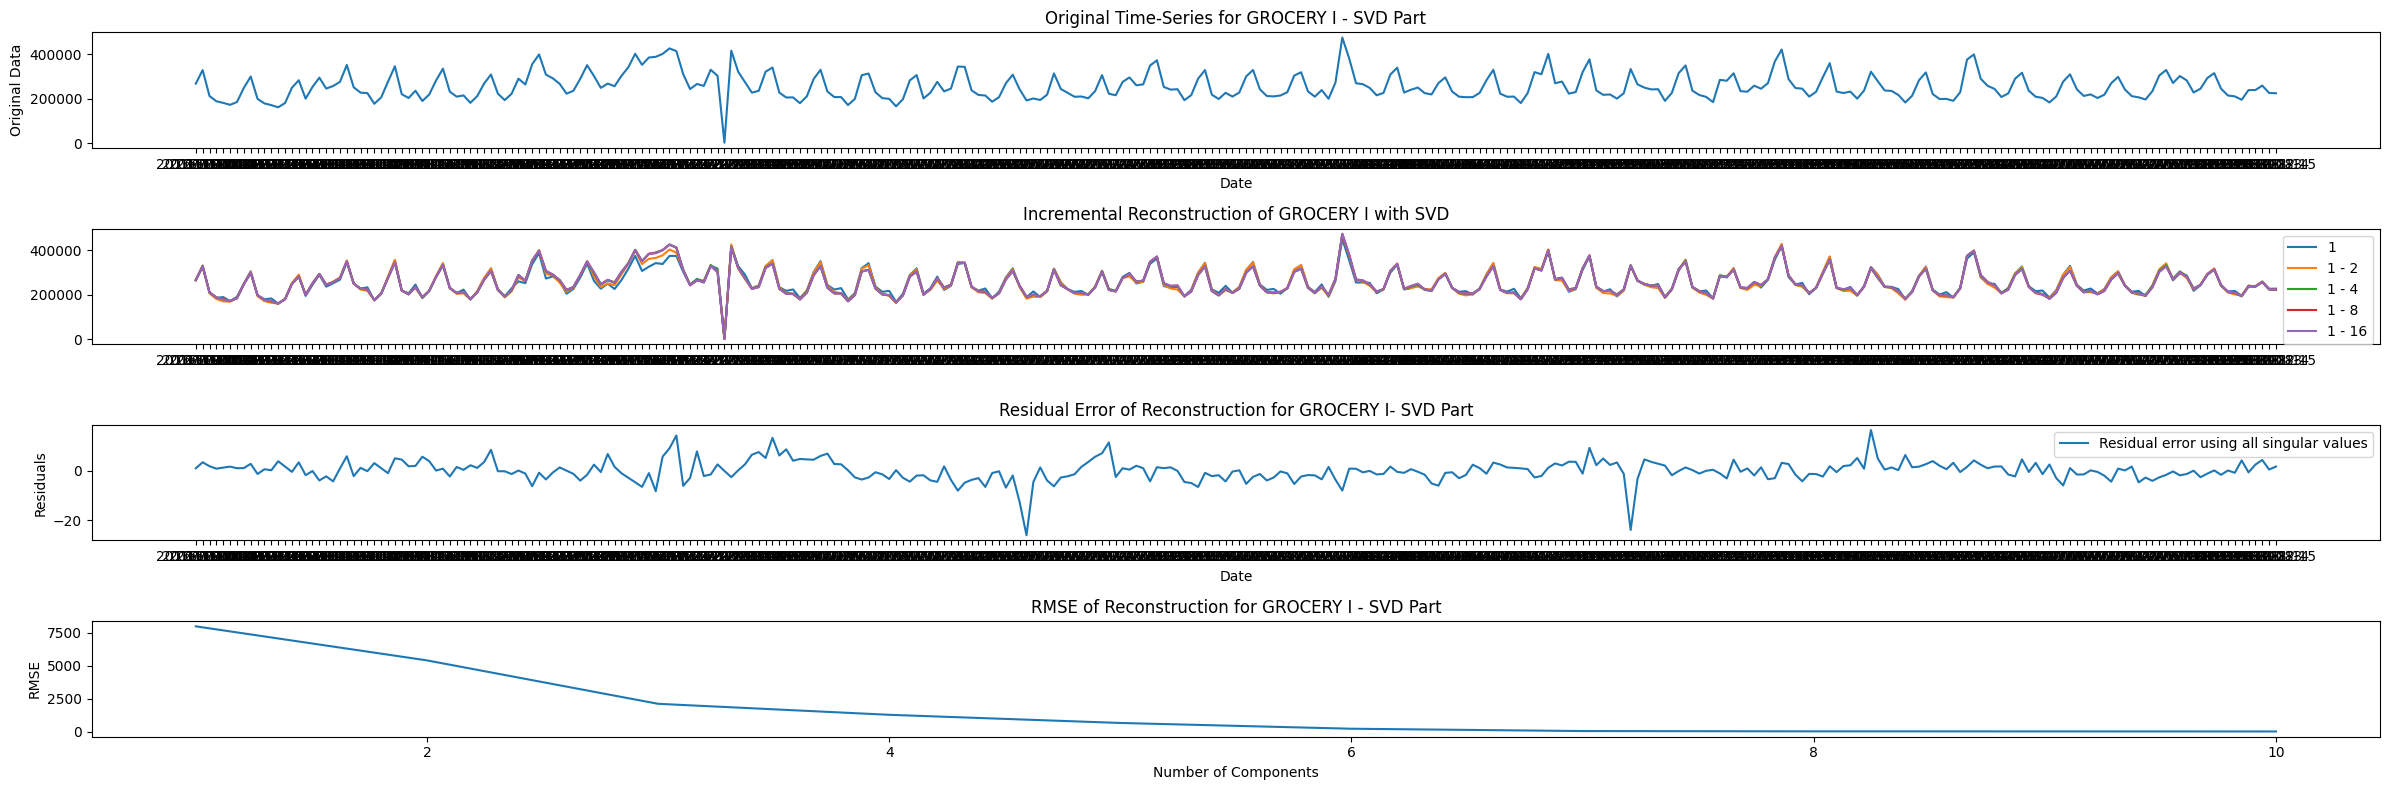

In [105]:
plot_family_figures_svd(data_raw, "GROCERY I")

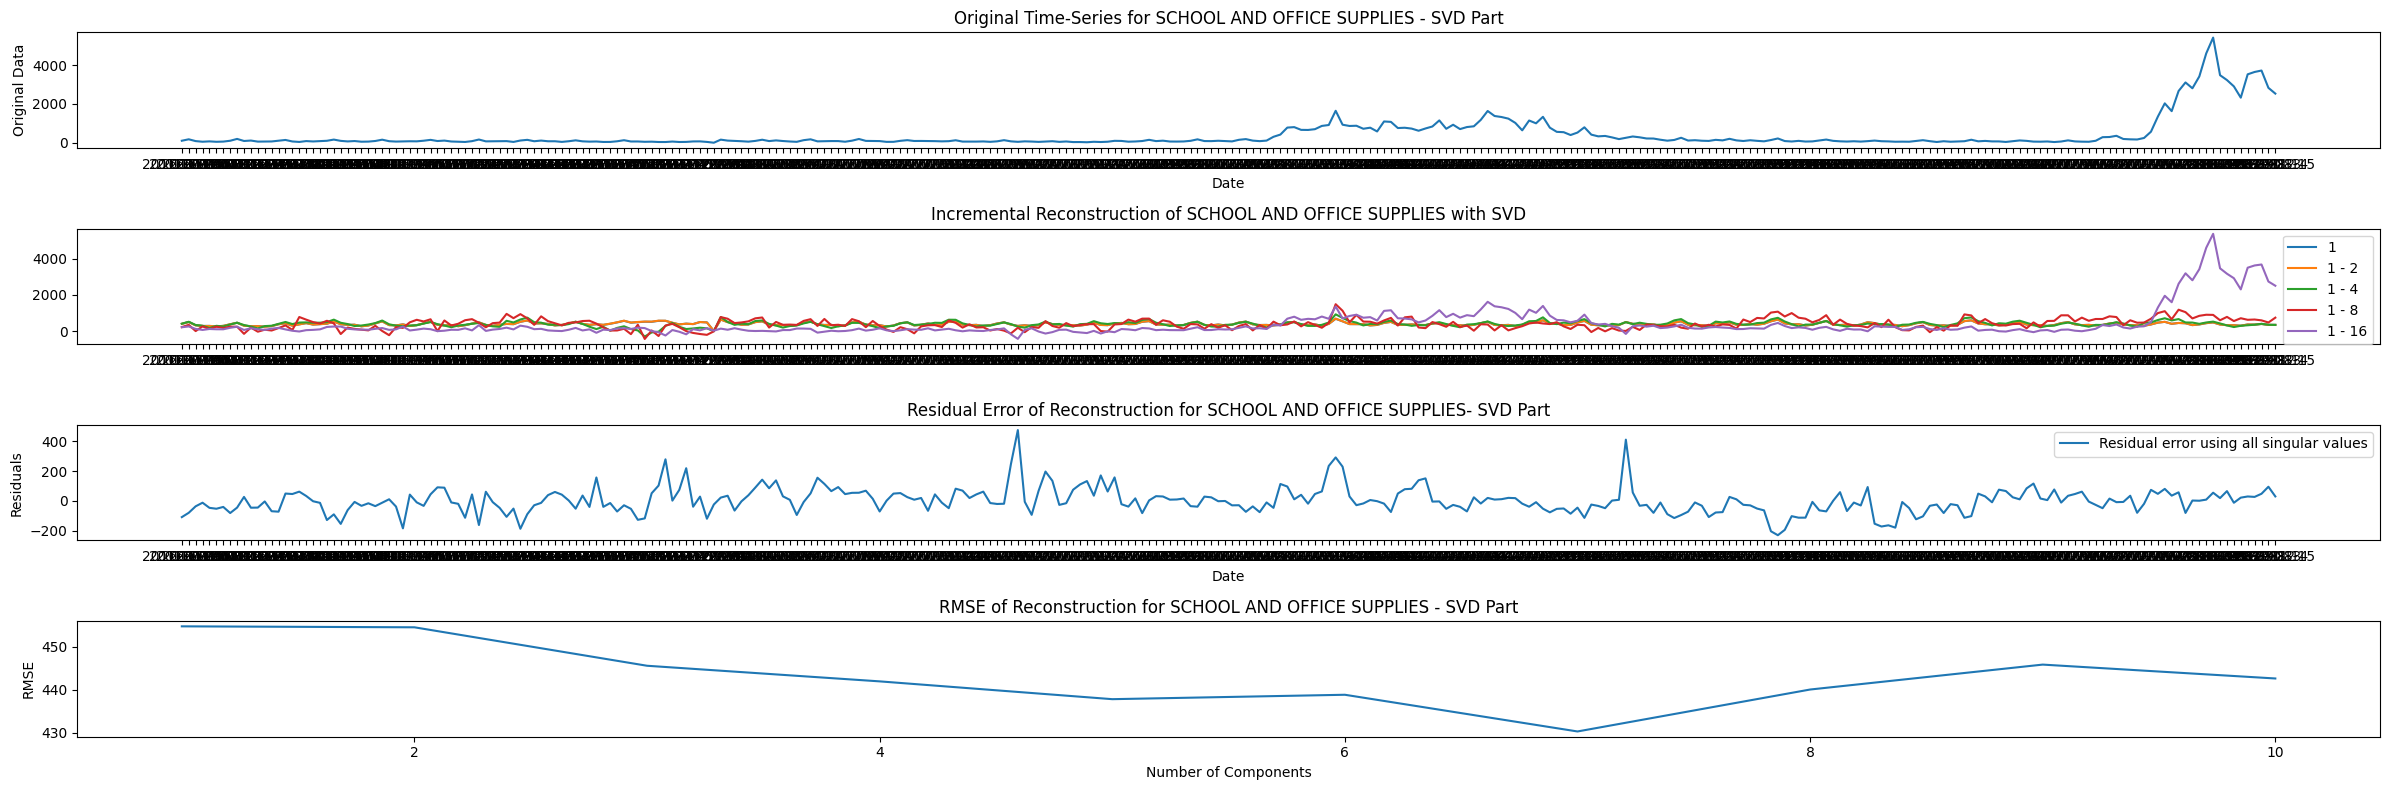

In [106]:
plot_family_figures_svd(data_raw, "SCHOOL AND OFFICE SUPPLIES")

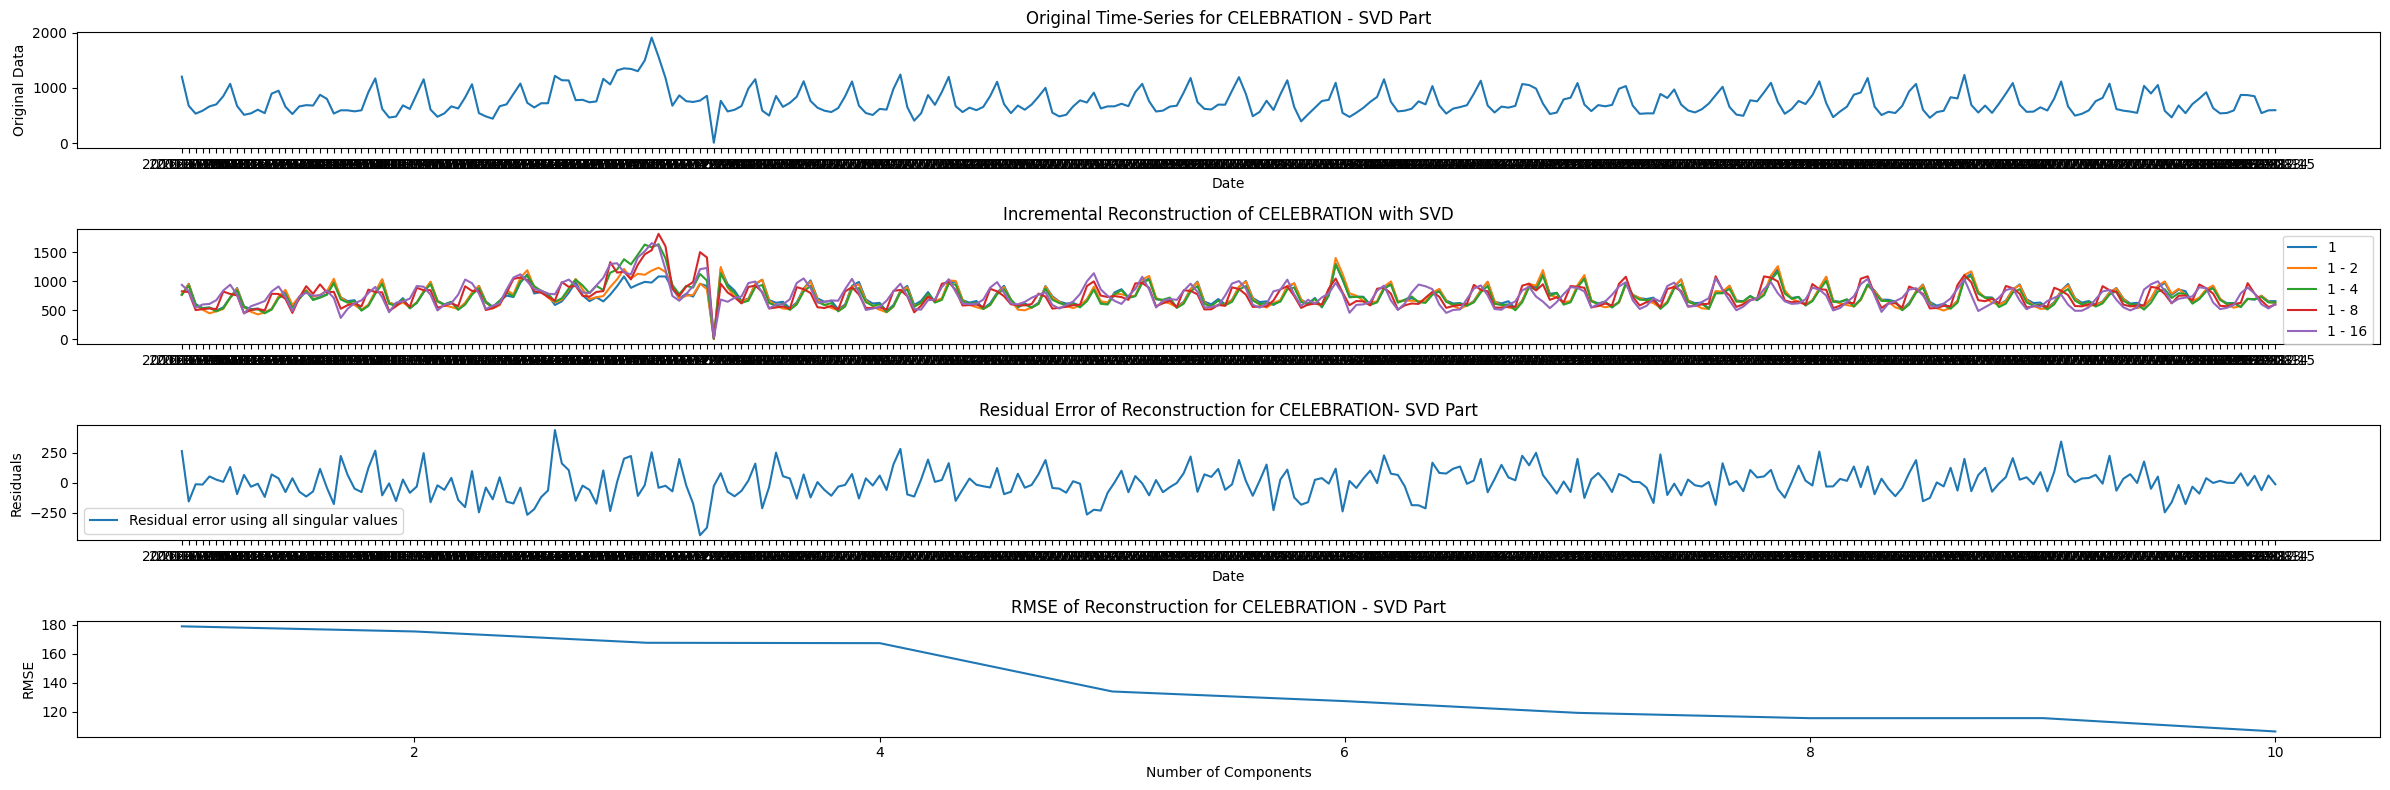

In [107]:
plot_family_figures_svd(data_raw, "CELEBRATION")

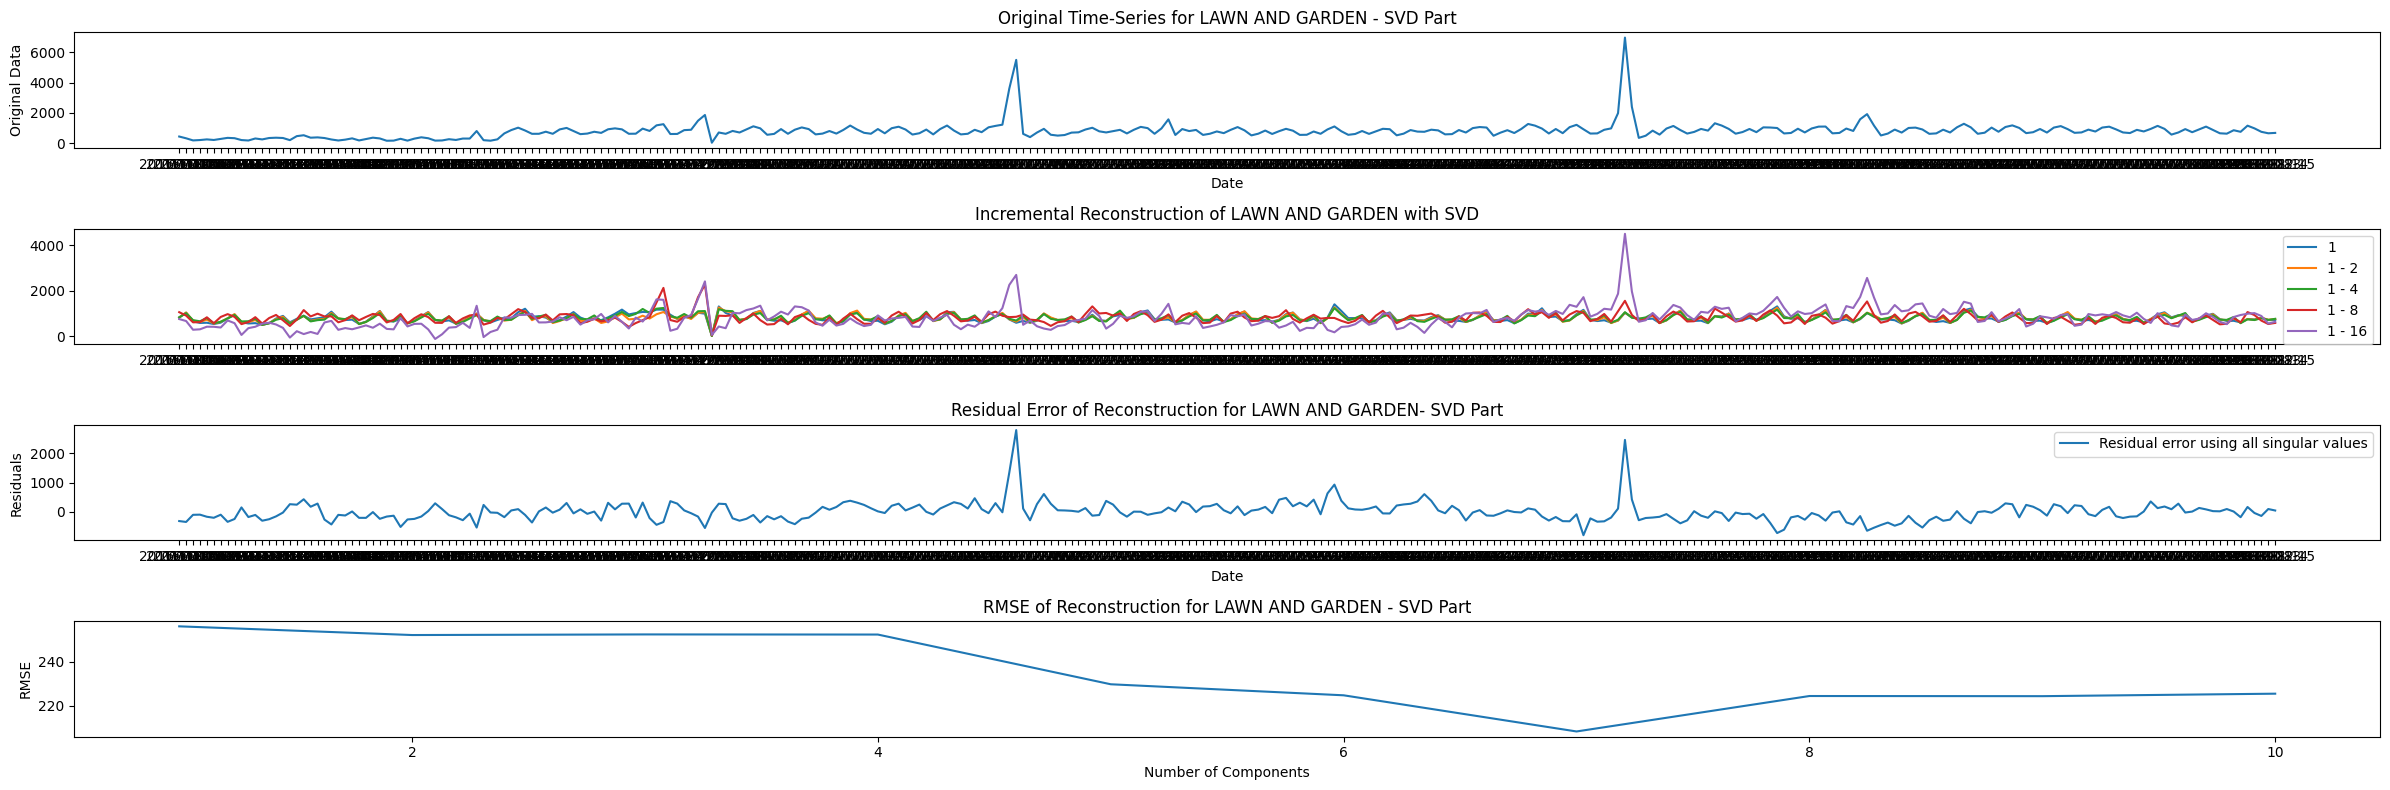

In [108]:
plot_family_figures_svd(data_raw, "LAWN AND GARDEN")

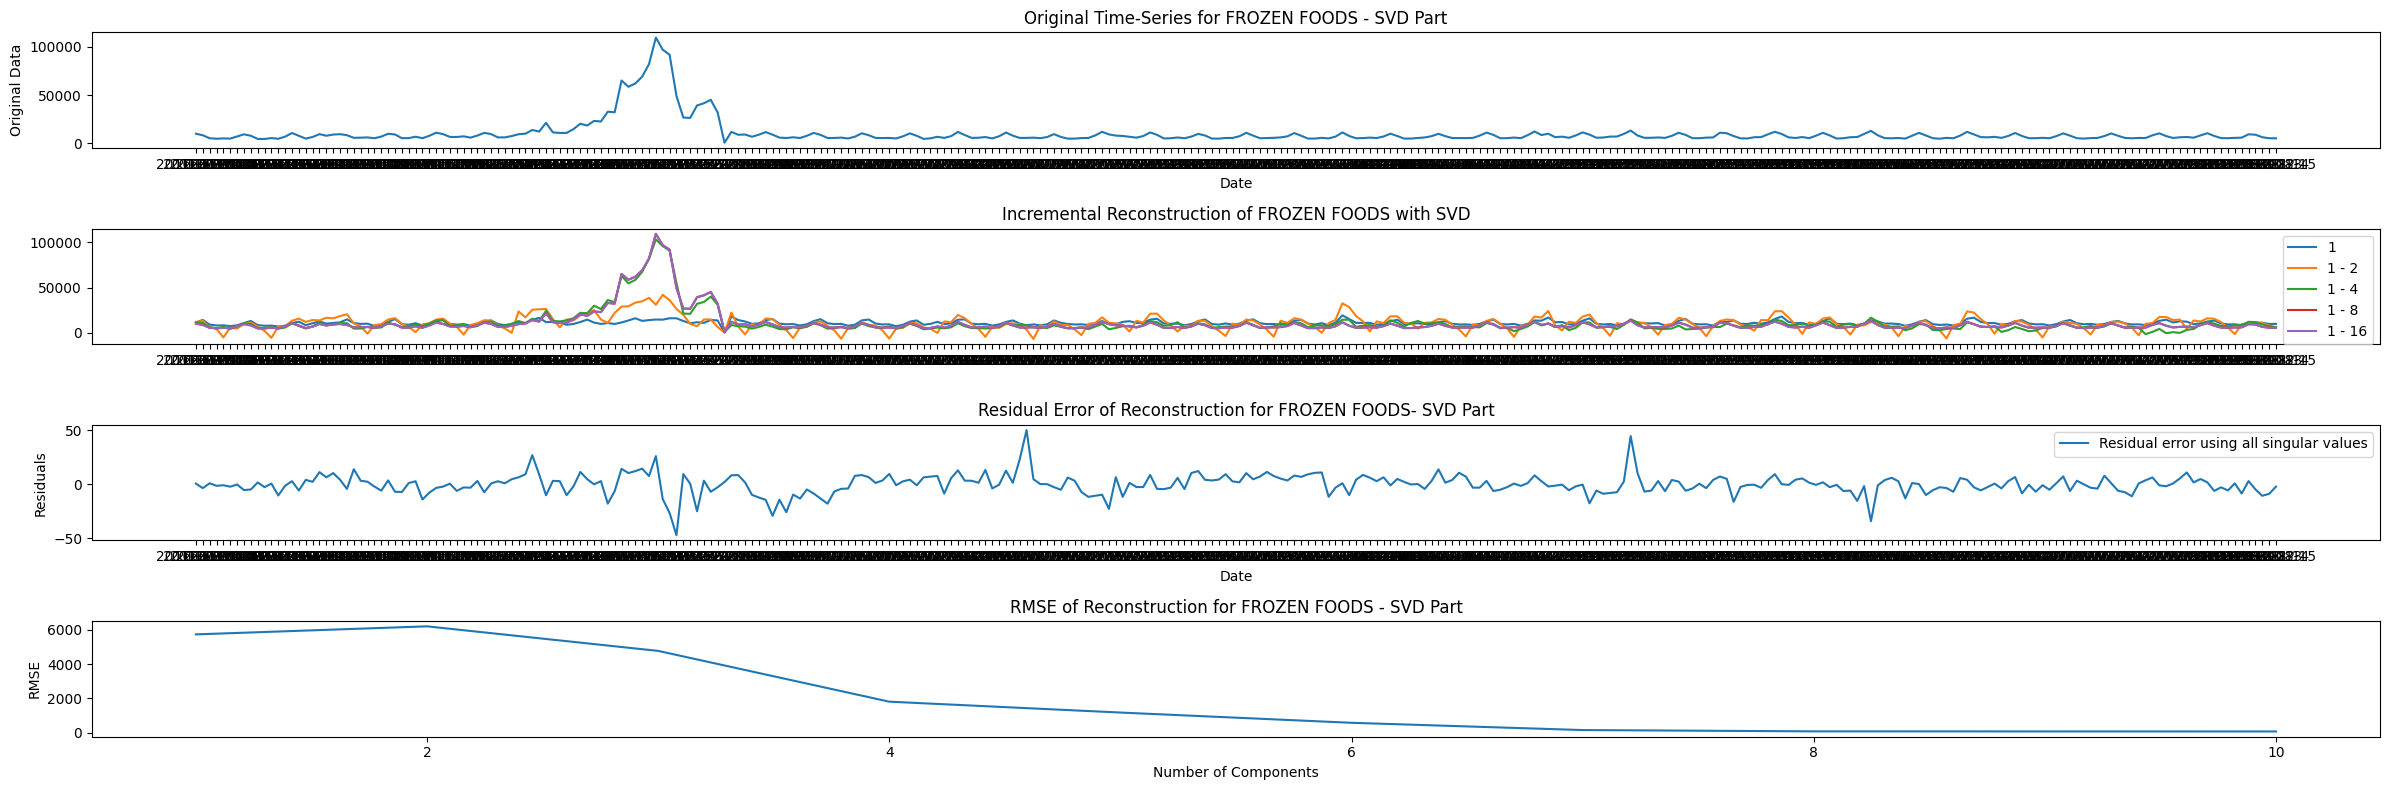

In [109]:
plot_family_figures_svd(data_raw, "FROZEN FOODS")

In [ ]:


'''

Explain if standardization or covariance computation is required for this
part.
--------------------------------------------------------------------------


For Singular Value Decomposition (SVD), neither standardization nor covariance
computation is necessary. Unlike Principal Component Analysis (PCA),
which relies on computing the covariance matrix, SVD directly decomposes the
original data matrix into three matrices: U, Σ, and V. This decomposition
is independent of the scale of the variables and does not involve covariance
calculations. Therefore, there is no need to standardize the data before
performing SVD. SVD operates directly on the raw data, making it robust to
differences in scale and eliminating the need for preprocessing steps such
as standardization or covariance computation.


'''

In [101]:
'''

Repeat part 3 and compare your PCA and SVD results. Write a function
to make this comparison [0.5], and comment on the results. [0.5].


'''


def compare_pca_svd_results(original_df, family_name):
    fig, axes = plt.subplots(4, 1, figsize=(24, 8), sharex=False, sharey=False)

    axes[0].plot(original_df.loc[family_name, :])
    axes[0].set_title(f'Original Time-Series for {family_name}')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Original Data')
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(original_df.values)

    n, m = df_scaled.shape
    Cov_matrix = np.dot(df_scaled.T, df_scaled) / (n - 1)
    U, s, V = np.linalg.svd(original_df)
    eigenValues, eigenVectors = get_sorted_eigen(Cov_matrix)
    pc = 5

    # Reconstruction using PCA
    W = eigenVectors[:, :pc]
    projected = np.dot(df_scaled, W)
    reconstructed = np.dot(projected, W.T)
    reconstructed_original = scaler.inverse_transform(reconstructed)
    reconstructed_df = pd.DataFrame(reconstructed_original, columns=original_df.columns, index=original_df.index)
    axes[1].set_title("Reconstruction using 5 Components")
    axes[1].plot(range(original_df.shape[1]), reconstructed_df.loc[family_name].values.ravel(), label='PCA')
    axes[1].legend()

    # Residual error for PCA
    axes[2].set_title("Residual Error for 5 Components")
    axes[2].plot(range(original_df.shape[1]), (original_df - reconstructed_df).loc[family_name].values.ravel(), label='PCA')

    # Reconstruction using SVD
    reconstructed_original = (U[:, :pc] * s[:pc]) @ V[:pc, :]
    reconstructed_df = pd.DataFrame(reconstructed_original, columns=original_df.columns, index=original_df.index)
    axes[1].plot(range(original_df.shape[1]), reconstructed_df.loc[family_name].values.ravel(), label='SVD')
    axes[1].legend()

    # Residual error for SVD
    axes[2].plot(range(original_df.shape[1]), (original_df - reconstructed_df).loc[family_name].values.ravel(), label='SVD')
    axes[2].legend()

    # RMSE for PCA and SVD
    RMSE_total = []
    RMSE_total_pca = []
    for num_comp in range(1, 11):
        # Perform PCA
        W = eigenVectors[:, :num_comp]
        project = np.dot(df_scaled, W)
        reconstruction = scaler.inverse_transform(np.dot(project, W.T))
        inverse_df = pd.DataFrame(reconstruction, columns=original_df.columns, index=original_df.index)
        family_pca = inverse_df[inverse_df.index == family_name]
        # Calculate RMSE for PCA
        y_actual_pca = pd.DataFrame(original_df.loc[family_name]).T
        RMSE_pca = mean_squared_error(y_actual_pca, family_pca, squared=False)
        RMSE_total_pca.append(RMSE_pca)

        # Reconstruct using the first num_comp singular values for SVD
        reconstruction_svd = np.dot(U[:, :num_comp] * s[:num_comp], V[:num_comp, :])
        inverse_df_svd = pd.DataFrame(reconstruction_svd, columns=original_df.columns, index=original_df.index)
        family_svd = inverse_df_svd[inverse_df_svd.index == family_name]
        # Calculate RMSE for SVD
        y_actual_svd = pd.DataFrame(original_df.loc[family_name]).T
        RMSE_svd = mean_squared_error(y_actual_svd, family_svd, squared=False)
        RMSE_total.append(RMSE_svd)

    # Plot RMSE for PCA and SVD
    axes[3].plot(range(1, 11), RMSE_total, label='SVD')
    axes[3].set_title(f'RMSE of Reconstruction for {family_name}')
    axes[3].set_xlabel('Number of Components')
    axes[3].set_ylabel('RMSE')
    axes[3].plot(range(1, 11), RMSE_total_pca, label='PCA')
    axes[3].legend()


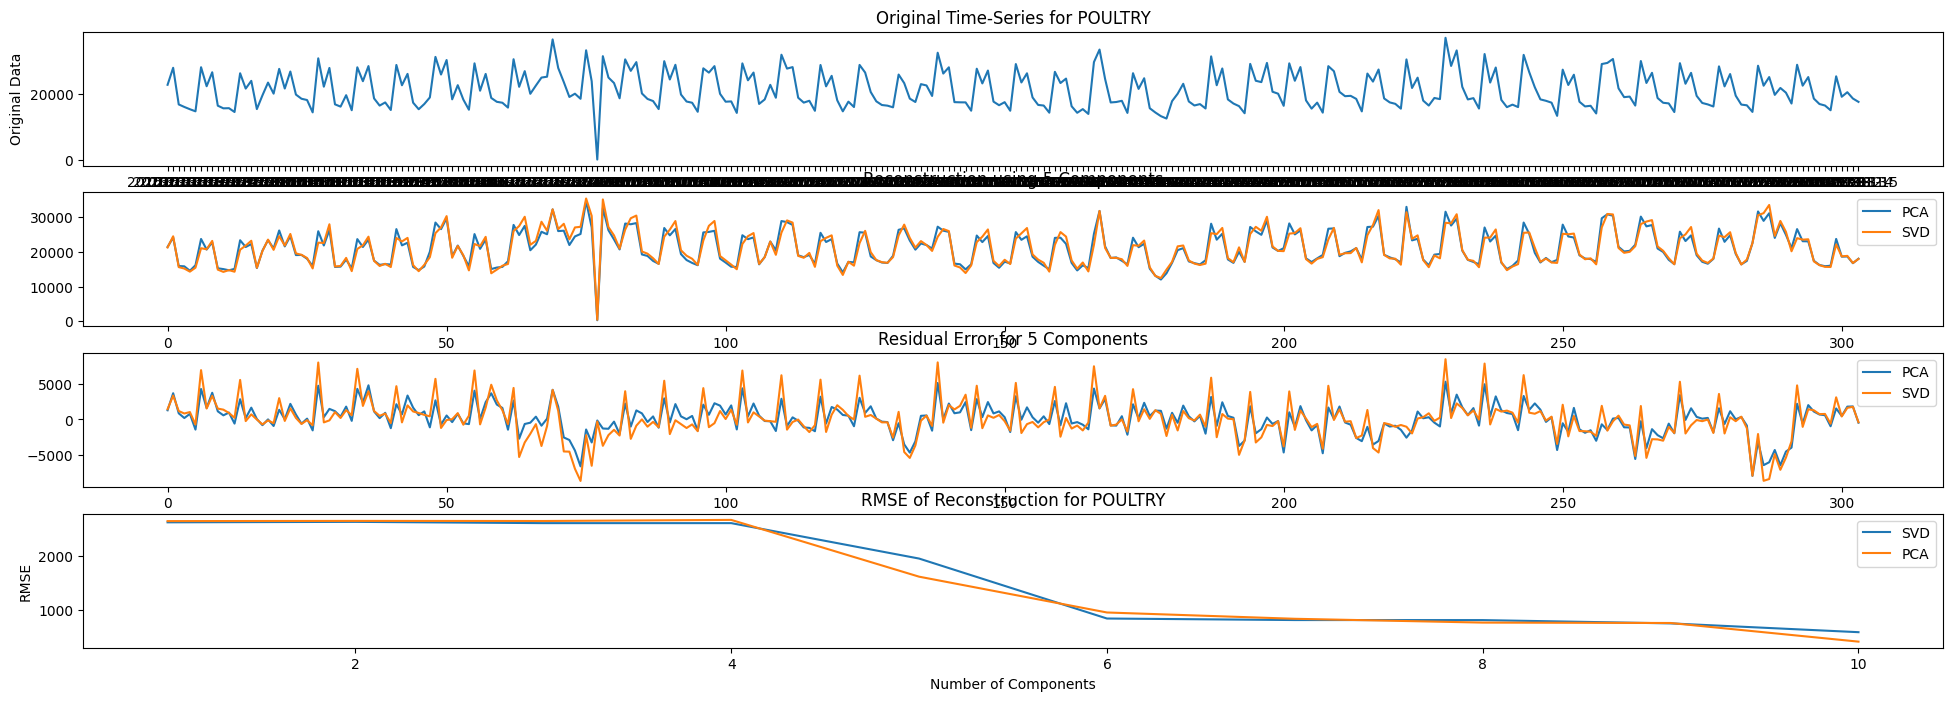

In [102]:
compare_pca_svd_results(data_raw,"POULTRY")

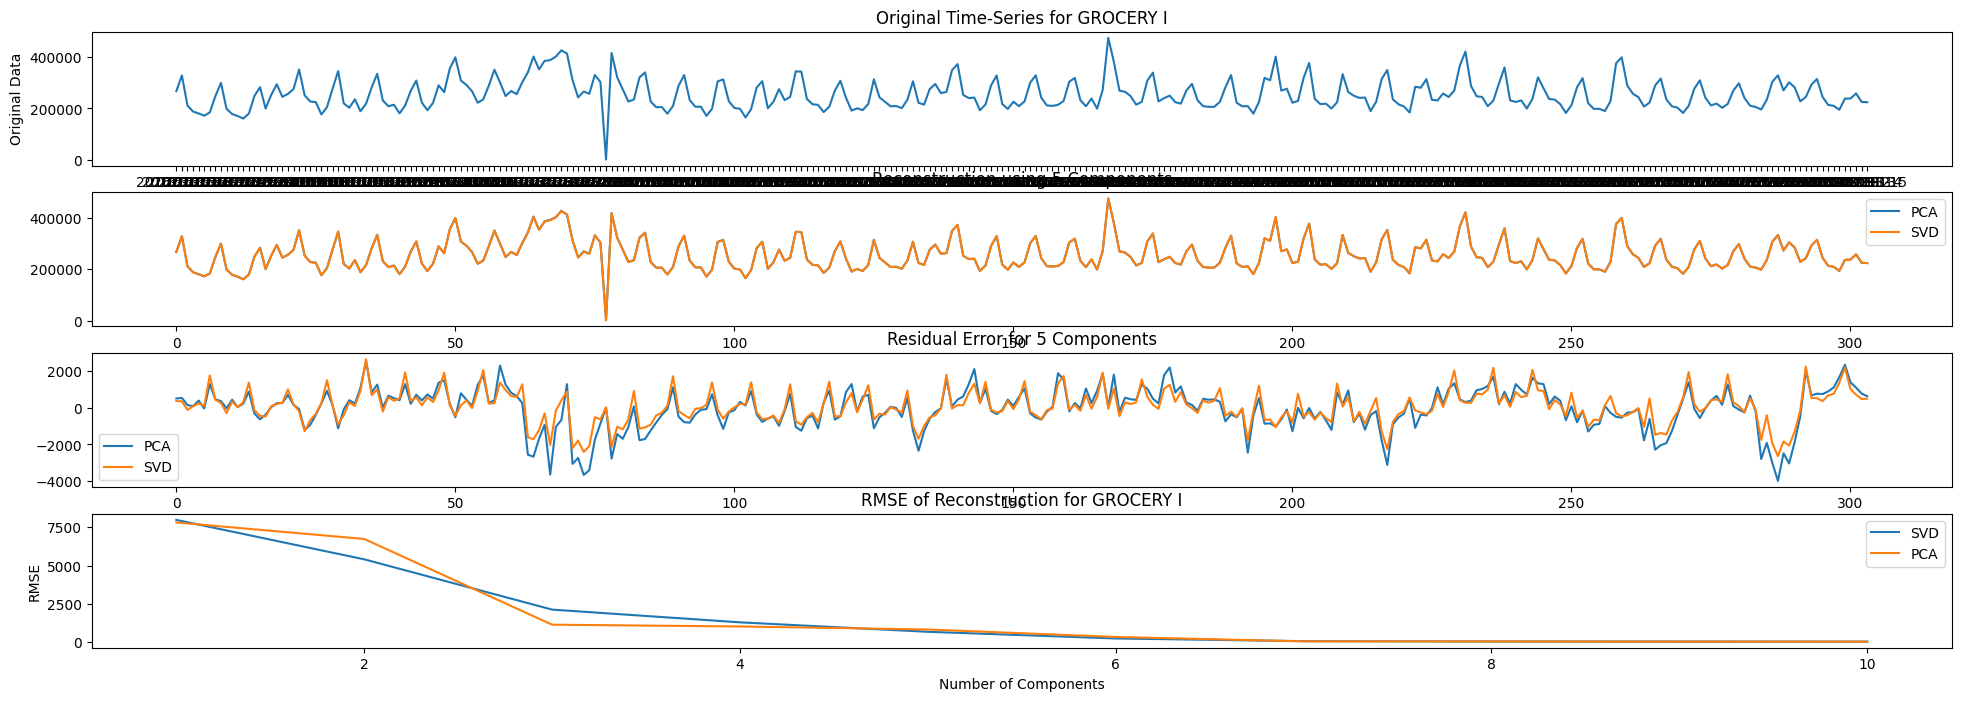

In [72]:
compare_pca_svd_results(data_raw,"GROCERY I")

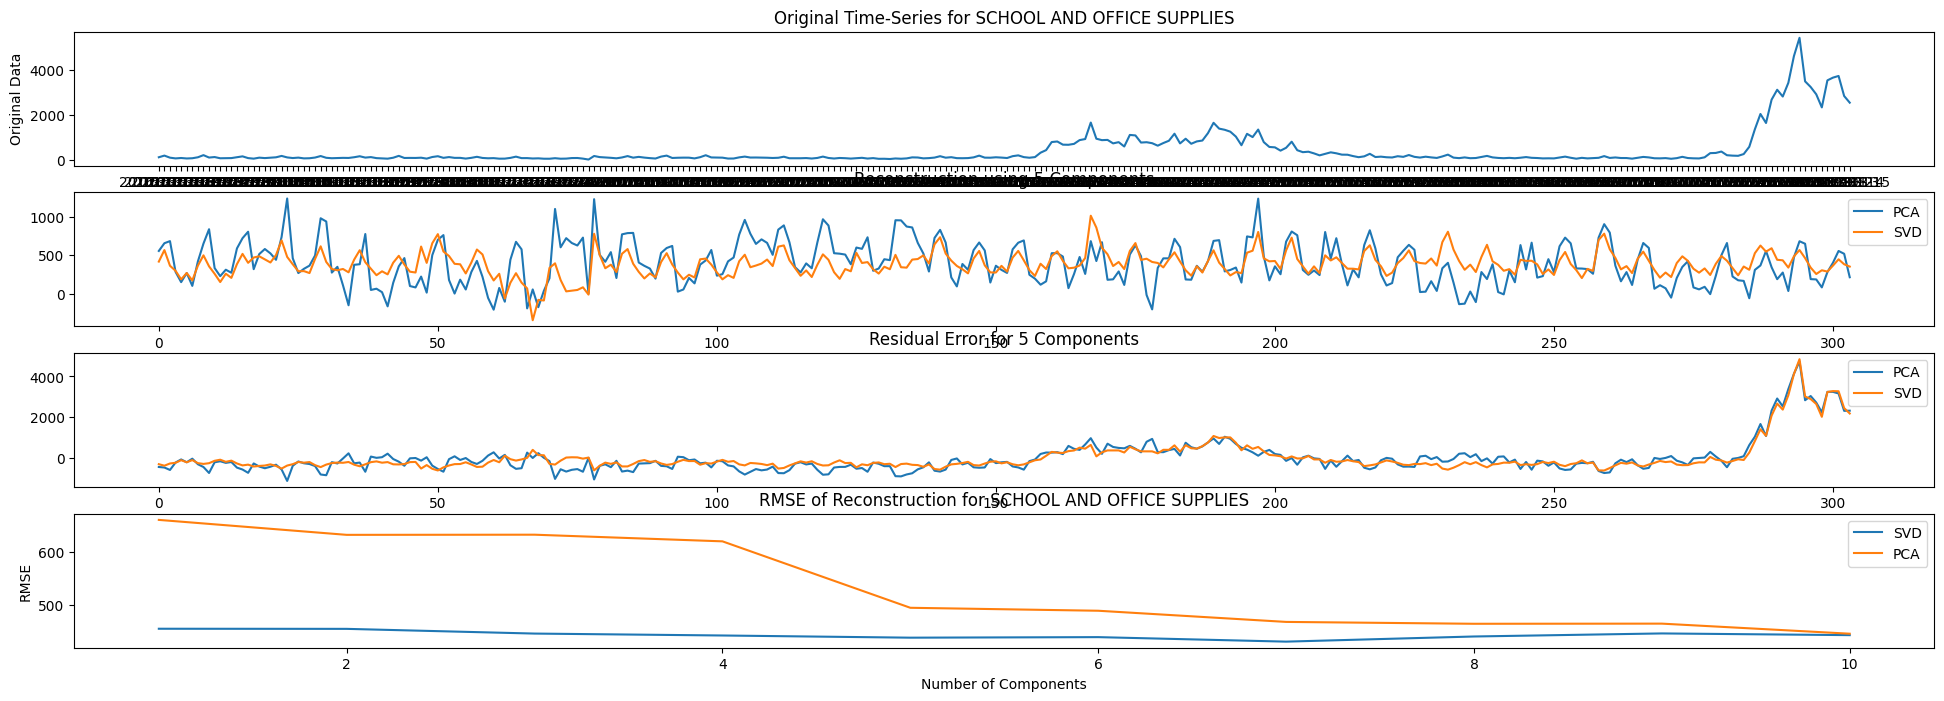

In [73]:
compare_pca_svd_results(data_raw,"SCHOOL AND OFFICE SUPPLIES")

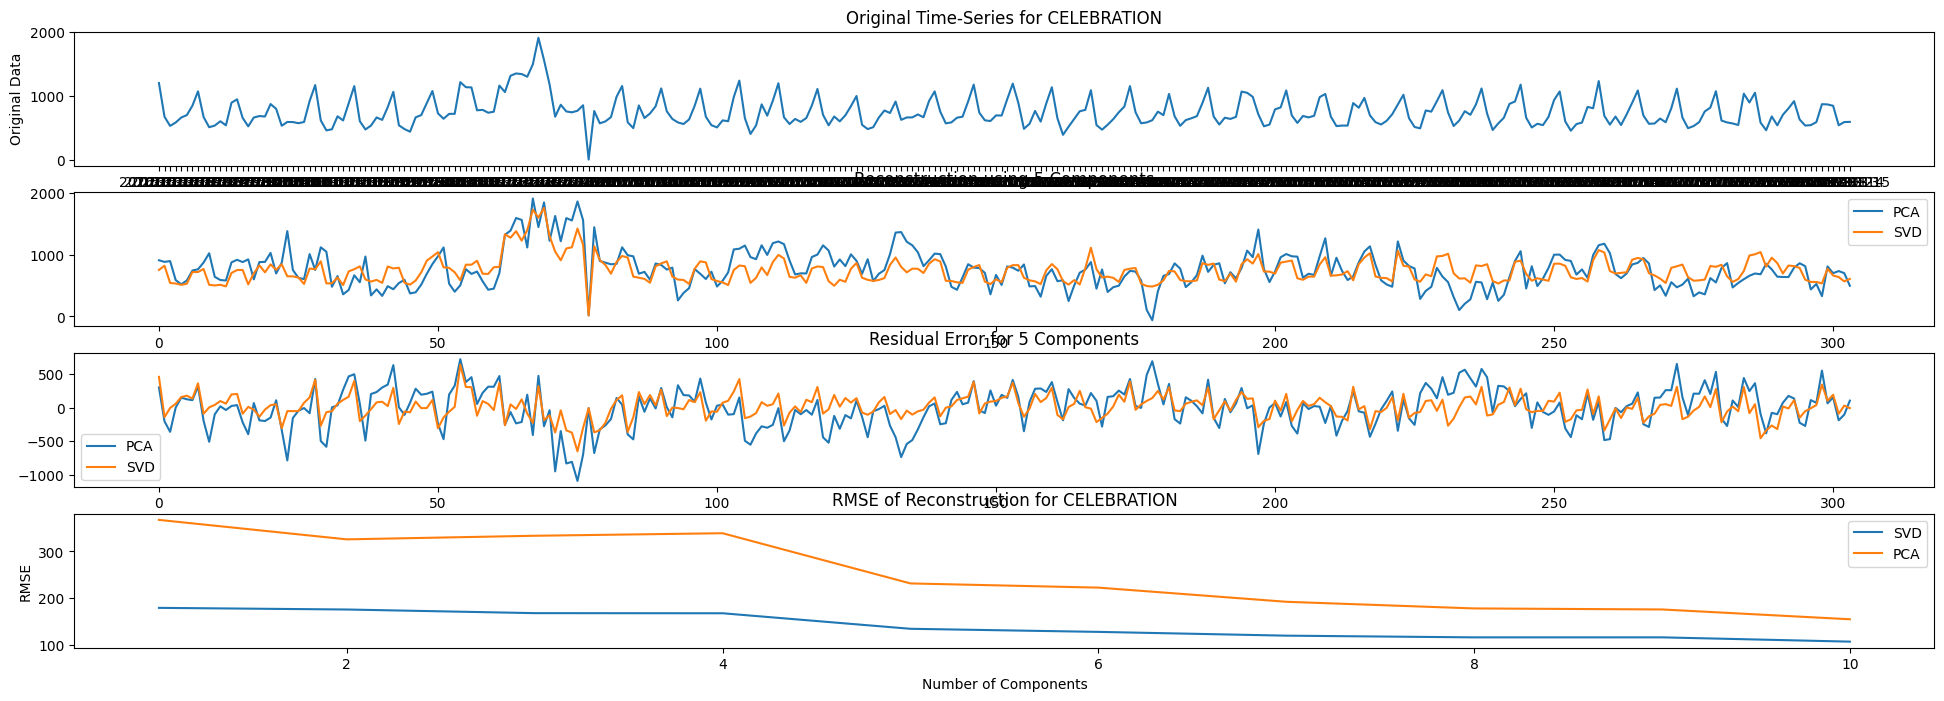

In [74]:
compare_pca_svd_results(data_raw,"CELEBRATION")

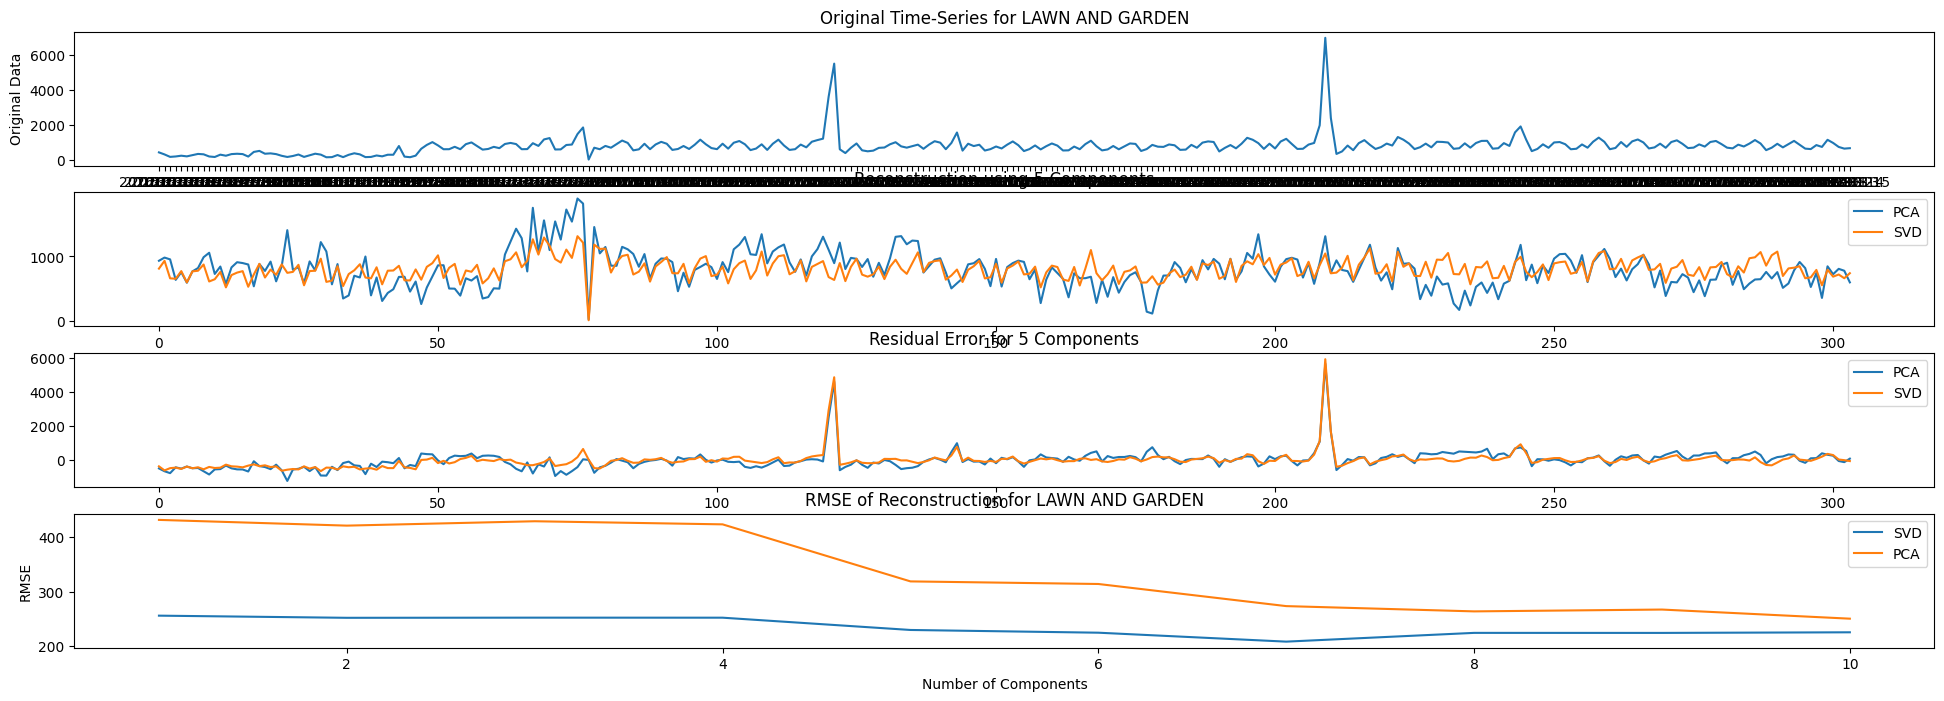

In [54]:
compare_pca_svd_results(data_raw,"LAWN AND GARDEN")

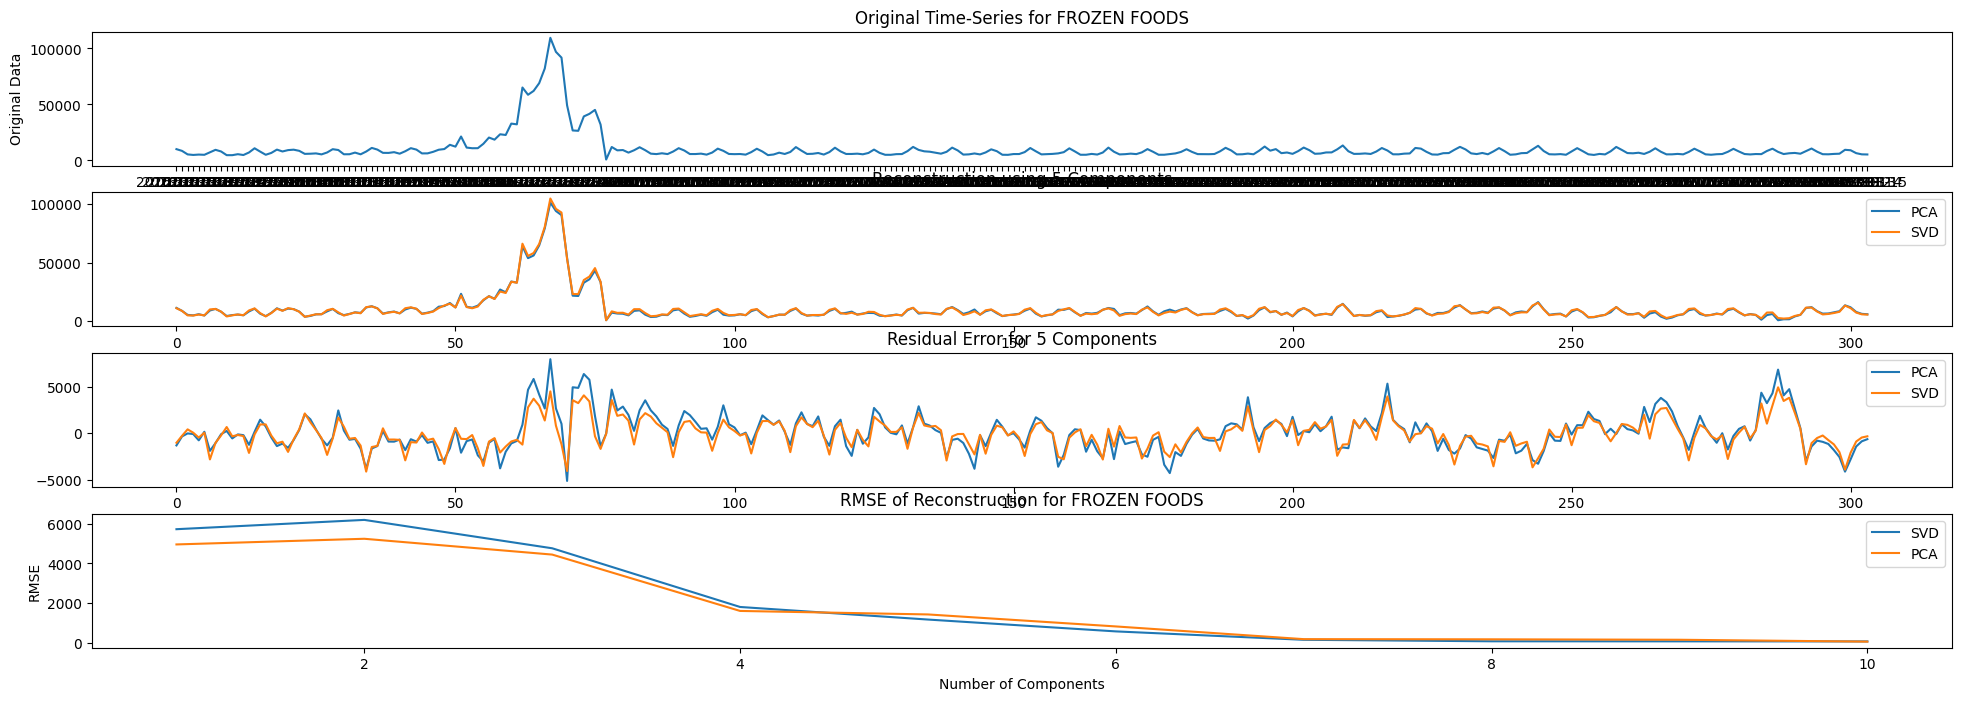

In [55]:
compare_pca_svd_results(data_raw,"FROZEN FOODS")

In [ ]:
'''
comment on the results.
-------------------------------------------
For Anaylayis the number of component is 5.

For POULTRY:

- Reconstruction: PCA and SVD both shows similar graph for reconsruction. We
can notice slight deviation but overall similar pattern.

- Residual Error: The residual error also shows similarity between PCA and SVD

- RMSE: Both SVD and PCA have similar RMSE in the beggining. SVD's RMSE
becomes lower on the slope and then both RMSEs becomes similar again. In the end,
SVD's RMSE is slightyly lower.


For GROCERY I:

- Reconstruction: PCA and SVD both shows similar graph for reconsruction.

- Residual Error: The residual error also shows similarity between PCA and SVD.
There are some regions where both graph slightly deviates.

- RMSE: PCA's RMSE is lower in the beginning. SVD's RMSE becomes lower in the
middle phase. After that, both have same RMSE and becomes stable.


For SCHOOL AND OFFICE SUPPLIES, CELEBRATION, and LAWN AND GARDEN:

- Reconstruction: PCA and SVD both shows similar graph for reconsruction but
have deviations at many places.

- Residual Error: The residual error also shows similarity between PCA and SVD.
There are some regions where both graph slightly deviates.

- RMSE: Clear difference in RMSE. SVD's RMSE is lower over the whole graph.


For FROZEN FOODS:

- Reconstruction: PCA and SVD both shows similar graph for reconsruction.

- Residual Error: The residual error also shows similarity between PCA and SVD.
There are some regions where both graph slightly deviates.

- RMSE: Both RMSEs are same except the beginning part where PCA is slightly lower.



'''


# Part 5: Let's collect another dataset! [2.5 Marks]
Create another dataset similar to the one provided in your handout using the raw information on average daily sales for different cities of Ecuador from 2015 to 2017 [here](https://github.com/Sabaae/Dataset/blob/main/AverageSalesbyCity.csv). **[1]**

You need to manipulate the data to organize it in the desired format (i.e., the same format that was in previous parts). Missing values were removed such that if there was a missing value for the average sales of a particular city at a given date, that date has been completely removed from the dataset, even if the data of that specific date existed for other cities.

You are free to use any tools you like, from Excel to Python! In the end, you should have a new CSV file similar to the previous dataset. How many features does the final dataset have? How many cities are there?


Upload your new dataset (in CSV format) to your colab notebook, repeat part 4 for this dataset **[1]**, and comment on the results **[0.5]**. When analyzing the cities, you may use `Manta`, `Cuenca`, `Puyo`, `Quito`, and `El Carmen`.


The code below helps you to upload your new CSV file to your colab session.

In [57]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving AverageSalesbyCity.csv to AverageSalesbyCity.csv


In [75]:
data_raw = pd.read_csv('AverageSalesbyCity.csv')


new_data = data_raw.pivot_table(index='city', columns='date', values='sales', aggfunc='mean')
new_data.head()

date      2015-10-09  2015-11-02  2015-11-03  2015-11-06  2015-11-10  \
city                                                                   
Ambato    477.909303  421.550182  548.353106  361.507106  307.576606   
Babahoyo  351.535667  385.161000  527.160394  344.543182  375.710849   
Cayambe   648.558636  673.696275  797.091150  456.792606  505.348333   
Cuenca    427.103747  368.002374  415.485626  381.169232  345.139353   
Daule     408.981182  414.147151  615.735909  287.995788  324.683939   

date      2015-11-11  2015-11-12  2015-11-27  2015-11-30  2015-12-08  ...  \
city                                                                  ...   
Ambato    307.828682  299.165060  366.139424  388.816712  367.452954  ...   
Babahoyo  263.556606  260.112091  295.949788  348.315909  389.455788  ...   
Cayambe   411.695030  403.564576  427.683818  511.405029  572.047273  ...   
Cuenca    329.527242  260.648202  302.041909  347.260061  363.566000  ...   
Daule     377.554455  304.972606  341.173303  440.002306  332.863091  ...   

date      2017-05-12  2017-05-24  2017-05-26  2017-06-23  2017-07-03  \
city                                                                   
Ambato    408.137136  409.239030  560.256015  398.430606  450.733000   
Babahoyo  344.894333  269.221091  417.890000  346.511121  426.239939   
Cayambe   458.924667  491.873818  618.249121  558.294061  815.593485   
Cuenca    404.720121  378.862727  461.394161  387.477030  485.306939   
Daule     391.043849  444.980212  557.286788  383.436091  505.725727   

date      2017-07-24  2017-07-25  2017-08-10  2017-08-11  2017-08-15  
city                                                                  
Ambato    426.976030  395.960712  375.903697  430.081318  367.434591  
Babahoyo  370.380910  461.958424  319.630606  435.050484  468.784152  
Cayambe   568.779058  563.385152  565.089303  578.747303  658.401212  
Cuenca    444.868283  436.829879  359.721838  317.374990  361.555283  
Daule     636.965273  417.444906  308.019697  493.828667  405.393303  

[5 rows x 88 columns]

In [76]:
### YOUR CODE HERE ###
'''

How many features does the final dataset have? How many cities are there?
-----------------------------------------------------------------------------

'''
# Number of features
num_features = new_data.shape[1]
print("Number of features:", num_features)

# Number of cities
num_cities = new_data.shape[0]
print("Number of cities:", num_cities)


Number of features: 88
Number of cities: 21


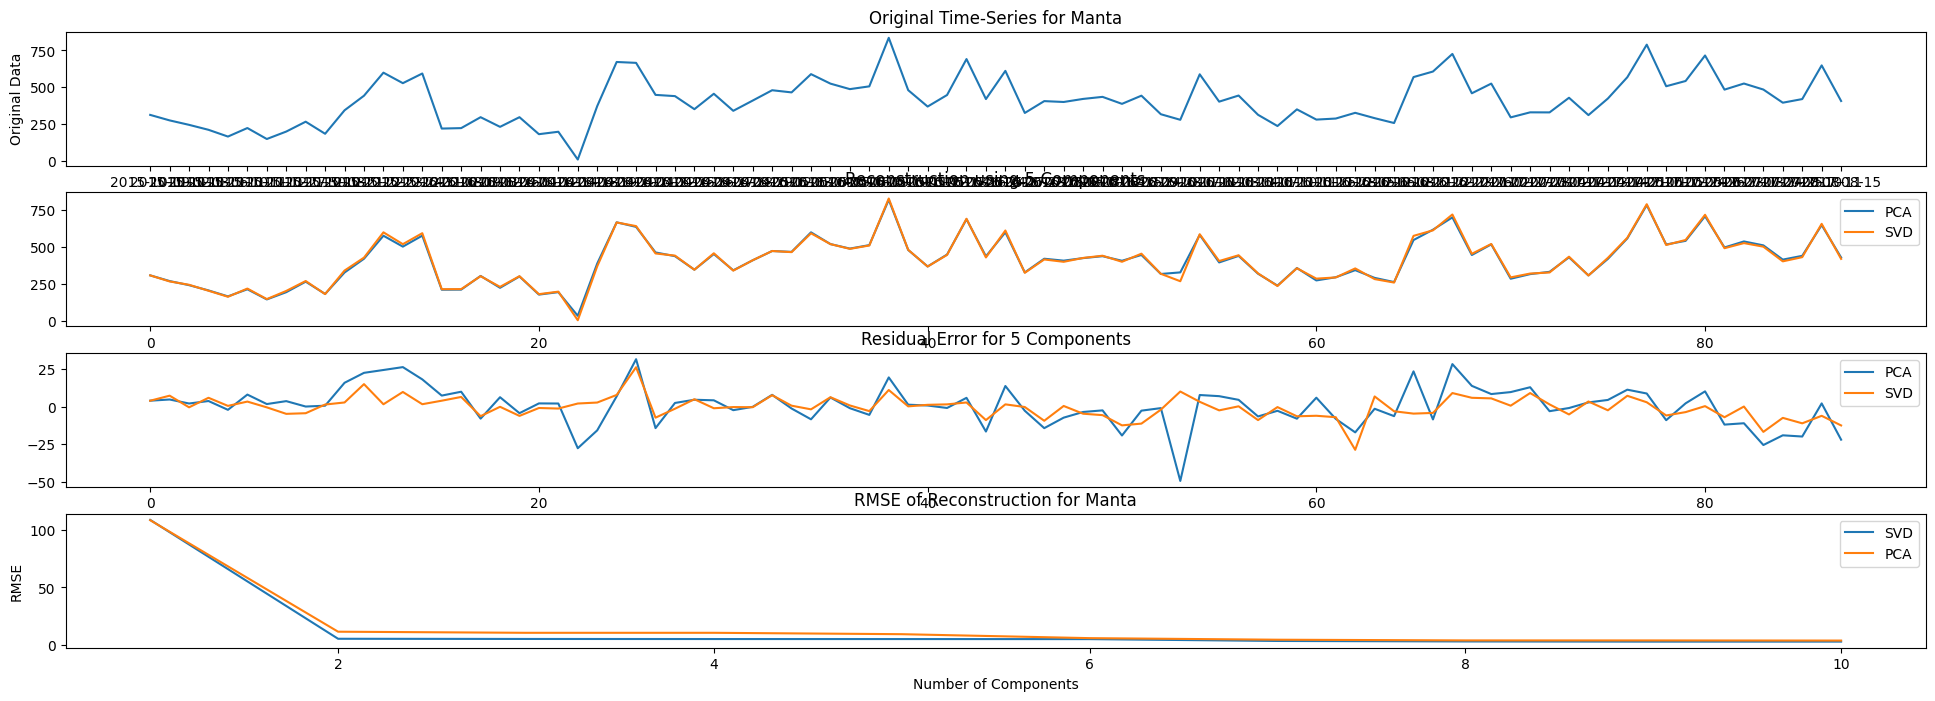

In [77]:
compare_pca_svd_results(new_data, "Manta")

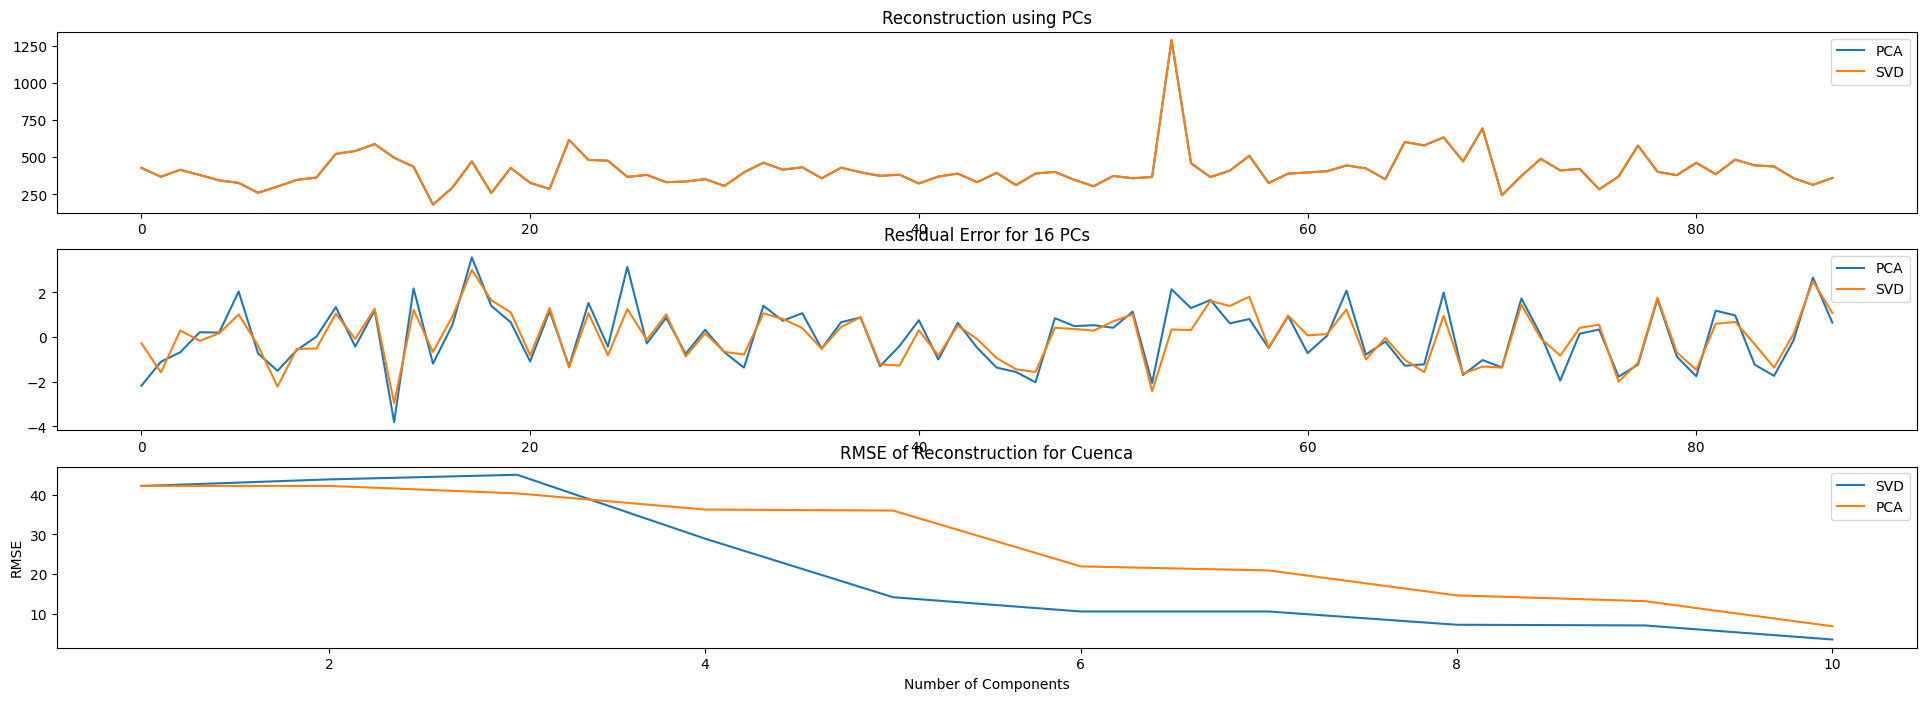

In [ ]:
compare_pca_svd_results(new_data, "Cuenca")

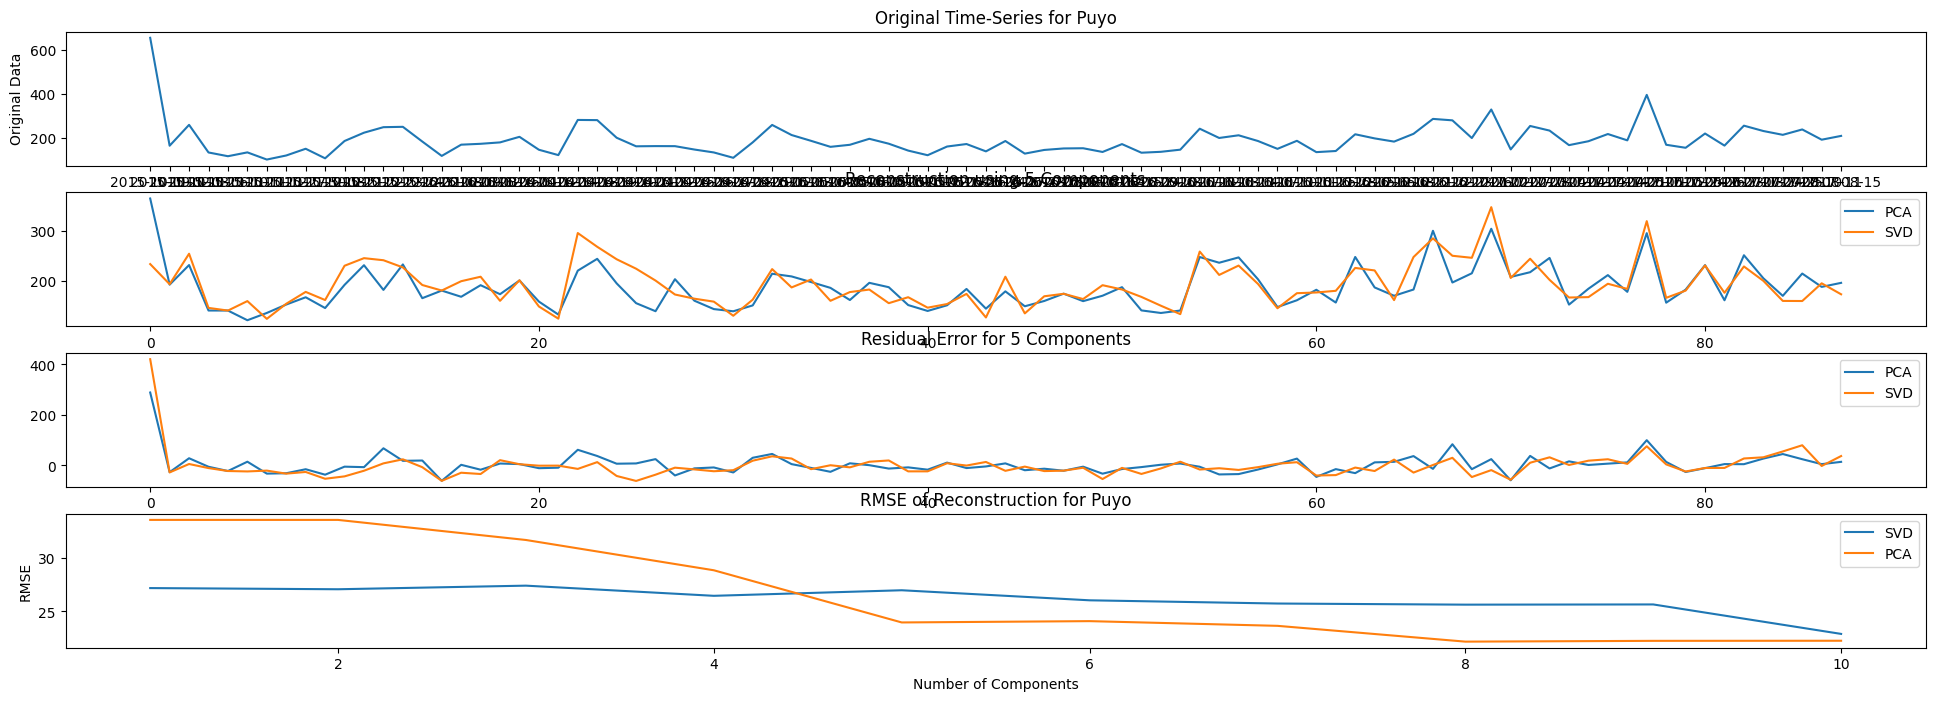

In [61]:
compare_pca_svd_results(new_data, "Puyo")

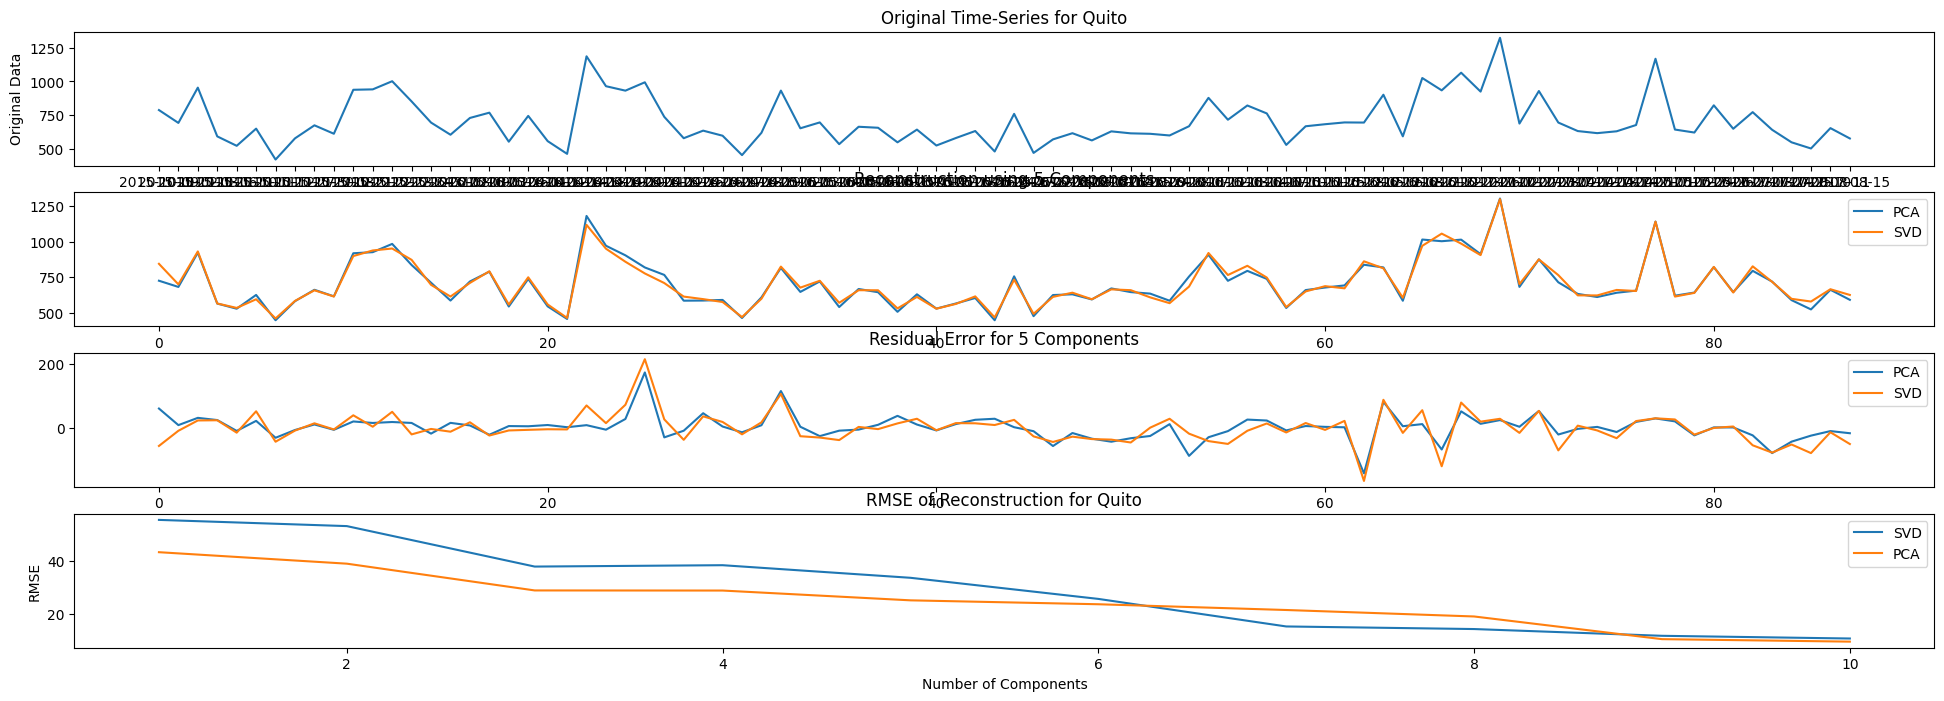

In [62]:
compare_pca_svd_results(new_data, "Quito")

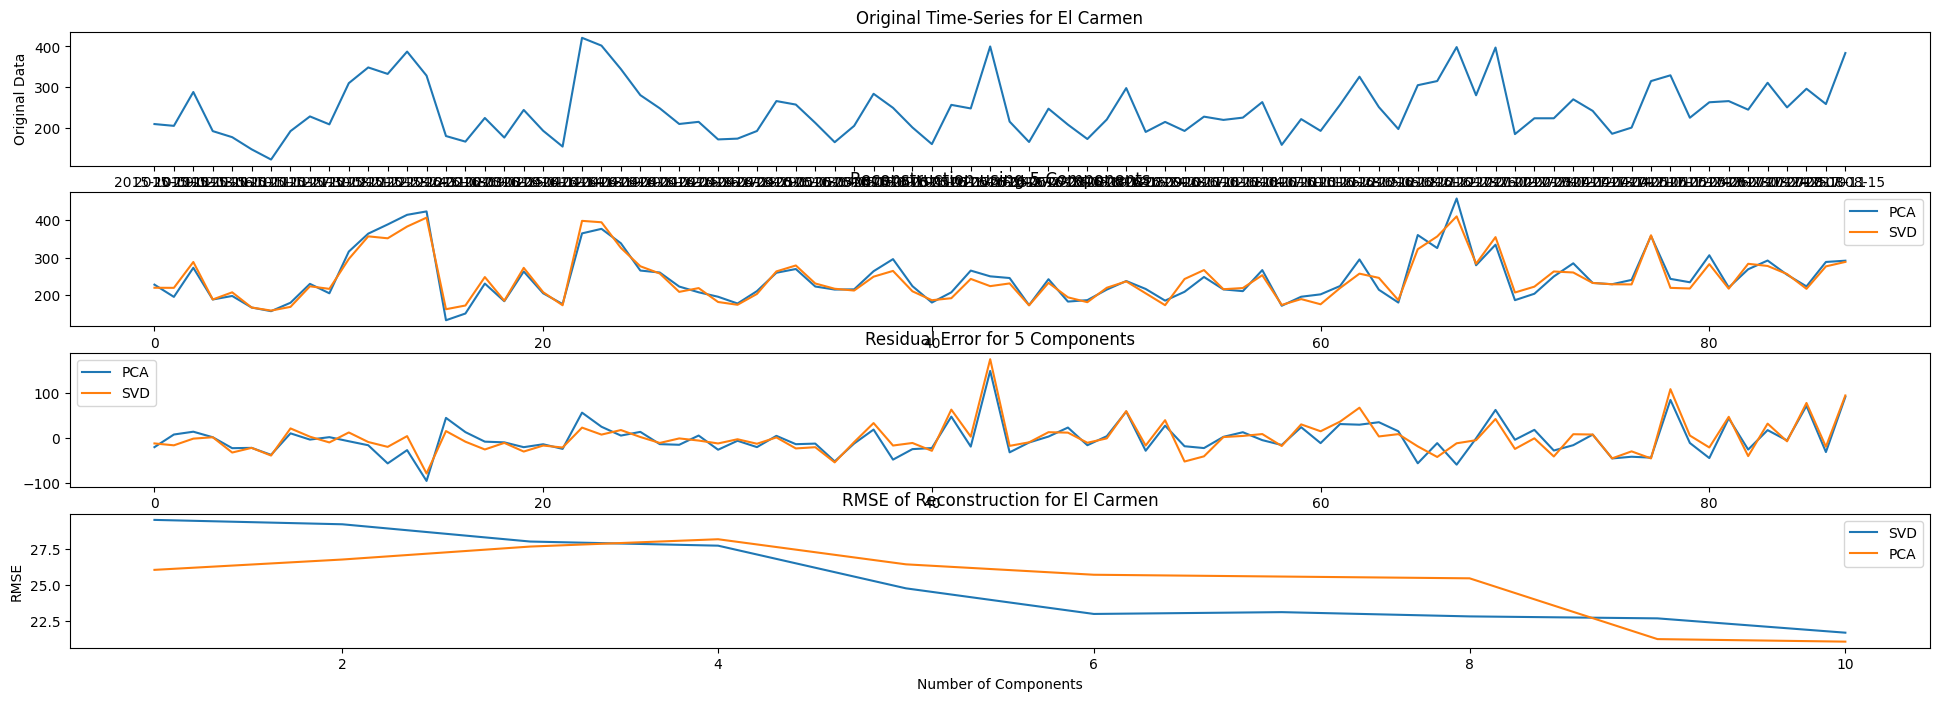

In [63]:
compare_pca_svd_results(new_data, "El Carmen")

In [ ]:
'''
Comment on the results
----------------------------------------------------

Reconstruction: For all the graphs, the reconstruction
graphs are similar for PCA and SVD. We can observe slight
deviation at some points for each city.

Residual Errors: The Residual error are also somewhat similar.
We can notice slightly deviations between the graphs. Only for Manta, the
graph is different where SVD recontruction is much stable than PCA reconstruction.

RMSE: For Manta, the RMSE is similar for SVD and PCA. Other than that, all other
cities have difference is their RMSE comparison graph. For other cities,
in most of the regions of RMSE, SVD is lower than PCA.



'''

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Sales Data:

1. https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

